# **Project Title : Annual Rainfall Prediction in India**  

**Project Type** : Regression  

**Group Members (Contribution)** :  
- Subhadeep Kumar Sahoo  
- Susmita Jana  
- Rupam Bhar  

**Dataset Source** : Kaggle – Annual Rainfall in India (1901–2015)

---

# 📌 Project Summary

This project focuses on **predictive modeling for annual rainfall in India**, utilizing a dataset spanning over a century of records across multiple Indian subdivisions.  

The workflow follows a structured approach:  

1. **Data Acquisition & Preliminary Analysis**  
   - Understanding dataset dimensions, attribute types, and statistical properties.  
   - Data cleaning: handling missing values, encoding categorical features, and filtering irrelevant information.  

2. **Exploratory Data Analysis (EDA)**  
   - Descriptive statistics and visualizations to explore rainfall distribution across years and regions.  
   - Correlation analysis to study dependencies among climatic factors.  
   - Trend analysis to capture long-term shifts in rainfall behavior.  

3. **Data Preparation**  
   - Feature engineering and encoding subdivision information.  
   - Splitting the dataset into training and testing sets.  
   - Applying scaling techniques to optimize model performance.  

4. **Modeling & Evaluation**  
   - Implementing multiple regression and ensemble models:  
     - Linear Regression, Decision Tree, Random Forest.  
   - Evaluating models using **R², RMSE, and MAE**.  
   - Hyperparameter tuning to improve accuracy and avoid overfitting.  

5. **Final Outcome**  
   - A comprehensive comparison between **predicted vs. actual rainfall values**.  
   - A robust rainfall prediction model with applications in:  
     - 🌱 Agriculture Planning  
     - 💧 Water Resource Management  
     - ⚠️ Disaster Preparedness  

---



# 📌 Problem Description

The **Rainfall in India dataset**, sourced from Kaggle, contains historical records of annual rainfall across different Indian subdivisions over more than a century. The dataset includes rainfall measurements along with relevant climatic and regional information.  

The final outcome of this project is a **predictive model** that estimates the amount of rainfall in a given region and year based on climatic factors such as temperature, humidity, and windspeed.  

Such predictions are highly valuable for:  
- 🌱 **Agriculture** – assisting farmers in crop planning and irrigation management.  
- 💧 **Water Resource Management** – ensuring sustainable allocation of water resources.  
- ⚠️ **Disaster Preparedness** – improving early warning systems for droughts and floods.  

---


# 📊 Data Description

The dataset contains **annual rainfall records** across multiple Indian subdivisions over more than 100 years.  

It includes the following information:  
- 📅 **Year** – the year of observation.  
- 🗺️ **Subdivision** – the geographical subdivision/region of India.  
- 🌧️ **Rainfall Data** – annual, seasonal, and monthly rainfall amounts (in millimeters).  

This dataset provides a comprehensive view of rainfall distribution patterns across time and regions, making it suitable for predictive modeling and long-term climate trend analysis.  

---

# 📑 Attribute Information

The dataset provides annual rainfall statistics across various Indian subdivisions from **1901 to 2015**.  
It contains the following attributes:

- **Index** : Serial number of the record  
- **Subdivision** : Name of the geographical subdivision/region of India  
- **Year** : Year of rainfall observation  

### 🌧️ Monthly Rainfall (mm)  
- **JAN** : Rainfall in January  
- **FEB** : Rainfall in February  
- **MAR** : Rainfall in March  
- **APR** : Rainfall in April  
- **MAY** : Rainfall in May  
- **JUN** : Rainfall in June  
- **JUL** : Rainfall in July  
- **AUG** : Rainfall in August  
- **SEP** : Rainfall in September  
- **OCT** : Rainfall in October  
- **NOV** : Rainfall in November  
- **DEC** : Rainfall in December  

### 📊 Aggregated Rainfall (mm)  
- **ANNUAL** : Total annual rainfall (sum of all months)  
- **Jan–Feb** : Cumulative rainfall for Jan & Feb (Winter)  
- **Mar–May** : Cumulative rainfall for Mar to May (Pre-Monsoon/Summer)  
- **Jun–Sep** : Cumulative rainfall for Jun to Sep (Southwest Monsoon)  
- **Oct–Dec** : Cumulative rainfall for Oct to Dec (Post-Monsoon)  


This structured dataset enables both **time-series analysis** and **regional rainfall prediction**, making it valuable for agricultural planning, climate studies, and water resource management.  

---


# 📥 **Importing Libraries and Data Loading**

In [ ]:
# 📚 Importing Necessary Libraries

# Data Handling
import pandas as pd      # For data manipulation and analysis
import numpy as np       # For numerical computations

# Visualization
import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns             # For statistical data visualization

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Advanced ML Libraries
import xgboost as xgb
from xgboost import plot_importance
from lightgbm import LGBMRegressor

# System Settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Inline plotting for Colab/Jupyter
%matplotlib inline


In [ ]:
# 📂 Data Loading

# Uploading the dataset file from local system to Google Colab
from google.colab import files
rainfall_file = files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [ ]:
import io
import pandas as pd

# reading the Rainfall dataset from uploaded file
data = pd.read_csv(io.BytesIO(rainfall_file['rainfall in india 1901-2015.csv']), encoding='unicode_escape')
print(data.sample(10))   # print 10 random rows to check dataset


      index               SUBDIVISION  YEAR   JAN    FEB    MAR    APR    MAY  \
2592   2592              KONKAN & GOA  1986   0.0    0.0    0.0    0.1    1.0   
3242   3242                 TELANGANA  1946   0.0   15.9    5.2   21.7   14.5   
3740   3740  NORTH INTERIOR KARNATAKA  1984   0.4    3.9    6.2   14.3    8.0   
911     911                     BIHAR  1915   8.2   57.1   22.5    6.4   72.5   
134     134         ARUNACHAL PRADESH  1940  12.7  168.5  381.8  133.9  480.5   
3483   3483                TAMIL NADU  1957   1.2   10.3   15.1   14.8   81.1   
893     893                 JHARKHAND  2012  34.6   10.3    1.5    9.6    6.6   
1742   1742           JAMMU & KASHMIR  1941  81.7   52.5  109.6   40.1   41.3   
2609   2609              KONKAN & GOA  2003   0.5    0.6    0.8    1.2   11.2   
3888   3888                    KERALA  1902   6.7    2.6   57.3   83.9  134.5   

        JUN     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
2592  777.2   543.2  670.9   65.0

### **Table Description**  

In the table below, we can observe how each row represents a different **year** for different **subdivisions of India**.  
The various attributes include the **year**, **subdivision name**, and **monthly as well as annual rainfall values** recorded in millimeters.


In [ ]:
#Data view

data.head(10)

index                SUBDIVISION  YEAR    JAN    FEB    MAR    APR    MAY  \
0      0  ANDAMAN & NICOBAR ISLANDS  1901   49.2   87.1   29.2    2.3  528.8   
1      1  ANDAMAN & NICOBAR ISLANDS  1902    0.0  159.8   12.2    0.0  446.1   
2      2  ANDAMAN & NICOBAR ISLANDS  1903   12.7  144.0    0.0    1.0  235.1   
3      3  ANDAMAN & NICOBAR ISLANDS  1904    9.4   14.7    0.0  202.4  304.5   
4      4  ANDAMAN & NICOBAR ISLANDS  1905    1.3    0.0    3.3   26.9  279.5   
5      5  ANDAMAN & NICOBAR ISLANDS  1906   36.6    0.0    0.0    0.0  556.1   
6      6  ANDAMAN & NICOBAR ISLANDS  1907  110.7    0.0  113.3   21.6  616.3   
7      7  ANDAMAN & NICOBAR ISLANDS  1908   20.9   85.1    0.0   29.0  562.0   
8      8  ANDAMAN & NICOBAR ISLANDS  1910   26.6   22.7  206.3   89.3  224.5   
9      9  ANDAMAN & NICOBAR ISLANDS  1911    0.0    8.4    0.0  122.5  327.3   

     JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   
5  733.3  247.7  320.5  164.3  267.8  128.9   79.2  2534.4     36.6    556.1   
6  305.2  443.9  377.6  200.4  264.4  648.9  245.6  3347.9    110.7    751.2   
7  693.6  481.4  699.9  428.8  170.7  208.1  196.9  3576.4    106.0    591.0   
8  472.7  264.3  337.4  626.6  208.2  267.3  153.5  2899.4     49.3    520.1   
9  649.0  253.0  187.1  464.5  333.8   94.5  247.1  2687.2      8.4    449.8   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   1977.6    571.0  
4   1624.9    630.8  
5   1465.8    475.9  
6   1327.1   1158.9  
7   2303.7    575.7  
8   1701.0    629.0  
9   1553.6    675.4

In [ ]:
#information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4116 non-null   int64  
 1   SUBDIVISION  4116 non-null   object 
 2   YEAR         4116 non-null   int64  
 3   JAN          4112 non-null   float64
 4   FEB          4113 non-null   float64
 5   MAR          4110 non-null   float64
 6   APR          4112 non-null   float64
 7   MAY          4113 non-null   float64
 8   JUN          4111 non-null   float64
 9   JUL          4109 non-null   float64
 10  AUG          4112 non-null   float64
 11  SEP          4110 non-null   float64
 12  OCT          4109 non-null   float64
 13  NOV          4105 non-null   float64
 14  DEC          4106 non-null   float64
 15  ANNUAL       4090 non-null   float64
 16  Jan-Feb      4110 non-null   float64
 17  Mar-May      4107 non-null   float64
 18  Jun-Sep      4106 non-null   float64
 19  Oct-De

We can observe from the above table that the dataset has **4116 rows** and **20 columns**.  
Some attributes such as **SUBDIVISION** are of type *object*, while the remaining attributes (YEAR, monthly rainfall, seasonal rainfall, and annual rainfall) are numerical.  
Another observation is that a few attributes contain **missing values**, which will need to be handled during the data cleaning process.


In [ ]:
# Let's get summary of all numerical values

data.describe()


index         YEAR          JAN          FEB          MAR  \
count  4116.000000  4116.000000  4112.000000  4113.000000  4110.000000   
mean   2057.500000  1958.218659    18.957320    21.805325    27.359197   
std    1188.331183    33.140898    33.585371    35.909488    46.959424   
min       0.000000  1901.000000     0.000000     0.000000     0.000000   
25%    1028.750000  1930.000000     0.600000     0.600000     1.000000   
50%    2057.500000  1958.000000     6.000000     6.700000     7.800000   
75%    3086.250000  1987.000000    22.200000    26.800000    31.300000   
max    4115.000000  2015.000000   583.700000   403.500000   605.600000   

               APR          MAY          JUN          JUL          AUG  \
count  4112.000000  4113.000000  4111.000000  4109.000000  4112.000000   
mean     43.127432    85.745417   230.234444   347.214334   290.263497   
std      67.831168   123.234904   234.710758   269.539667   188.770477   
min       0.000000     0.000000     0.400000     0.000000     0.000000   
25%       3.000000     8.600000    70.350000   175.600000   155.975000   
50%      15.700000    36.600000   138.700000   284.800000   259.400000   
75%      49.950000    97.200000   305.150000   418.400000   377.800000   
max     595.100000  1168.600000  1609.900000  2362.800000  1664.600000   

               SEP          OCT          NOV          DEC       ANNUAL  \
count  4110.000000  4109.000000  4105.000000  4106.000000  4090.000000   
mean    197.361922    95.507009    39.866163    18.870580  1411.008900   
std     135.408345    99.519134    68.685410    42.369611   903.846565   
min       0.100000     0.000000     0.000000     0.000000    62.300000   
25%     100.525000    14.600000     0.700000     0.100000   804.500000   
50%     173.900000    65.200000     9.500000     3.000000  1121.300000   
75%     265.800000   148.400000    46.100000    17.500000  1644.775000   
max    1222.000000   948.300000   648.900000   617.500000  6331.100000   

           Jan-Feb      Mar-May      Jun-Sep      Oct-Dec  
count  4110.000000  4107.000000  4106.000000  4103.000000  
mean     40.747786   155.901753  1064.724769   154.100487  
std      59.308277   201.316965   707.741531   166.942660  
min       0.000000     0.000000    57.400000     0.000000  
25%       4.100000    24.050000   573.850000    34.200000  
50%      19.200000    74.800000   881.100000    98.200000  
75%      50.375000   196.950000  1288.175000   213.500000  
max     699.500000  1745.800000  4536.900000  1252.500000

In [ ]:
#checking of columns

data.columns

Index(['index', 'SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
#duplicacy checking

len(data[data.duplicated()])

0

In [ ]:
# analysing how many rows and columns present

data.shape

(4116, 20)

In [ ]:
# Checking for total null values in each column

data.isnull().sum().sort_values(ascending=False)

ANNUAL         26
Oct-Dec        13
NOV            11
DEC            10
Jun-Sep        10
Mar-May         9
JUL             7
OCT             7
MAR             6
SEP             6
Jan-Feb         6
JUN             5
AUG             4
APR             4
JAN             4
FEB             3
MAY             3
YEAR            0
index           0
SUBDIVISION     0
dtype: int64

### 📊 Finding details from data:

- There are **20 features** with **4116 rows of data**.  
- There is **1 categorical column** (`SUBDIVISION`) and **19 numerical columns**.  
- Columns `index` and `YEAR` are of **int64 numerical data type**.  
- Columns from `JAN` to `DEC` (monthly values), along with `ANNUAL`, `Jan-Feb`, `Mar-May`, `Jun-Sep`, and `Oct-Dec`, are of **float64 numerical data type**.  
- Column `SUBDIVISION` is of **object (categorical) data type**.  
- There are **missing values present** in multiple columns, with the highest being **26 nulls in ‘ANNUAL’**, followed by **13 in ‘Oct-Dec’** and smaller counts in other months.  
- ✅ **No duplicate rows** are present in the dataset.  
- **Unique count**: `SUBDIVISION` contains **36 unique categories** (climate subdivisions of India).

---


## 🔎 **Data Filtering**

To analyze the dataset effectively, we first need to filter the data based on required conditions.  
Filtering helps us to focus on specific subsets of the dataset, such as removing missing values, selecting particular years, or analyzing specific subdivisions.  


In [ ]:
#creat a copy of dataset before handling data

rainfall_data = data.copy()

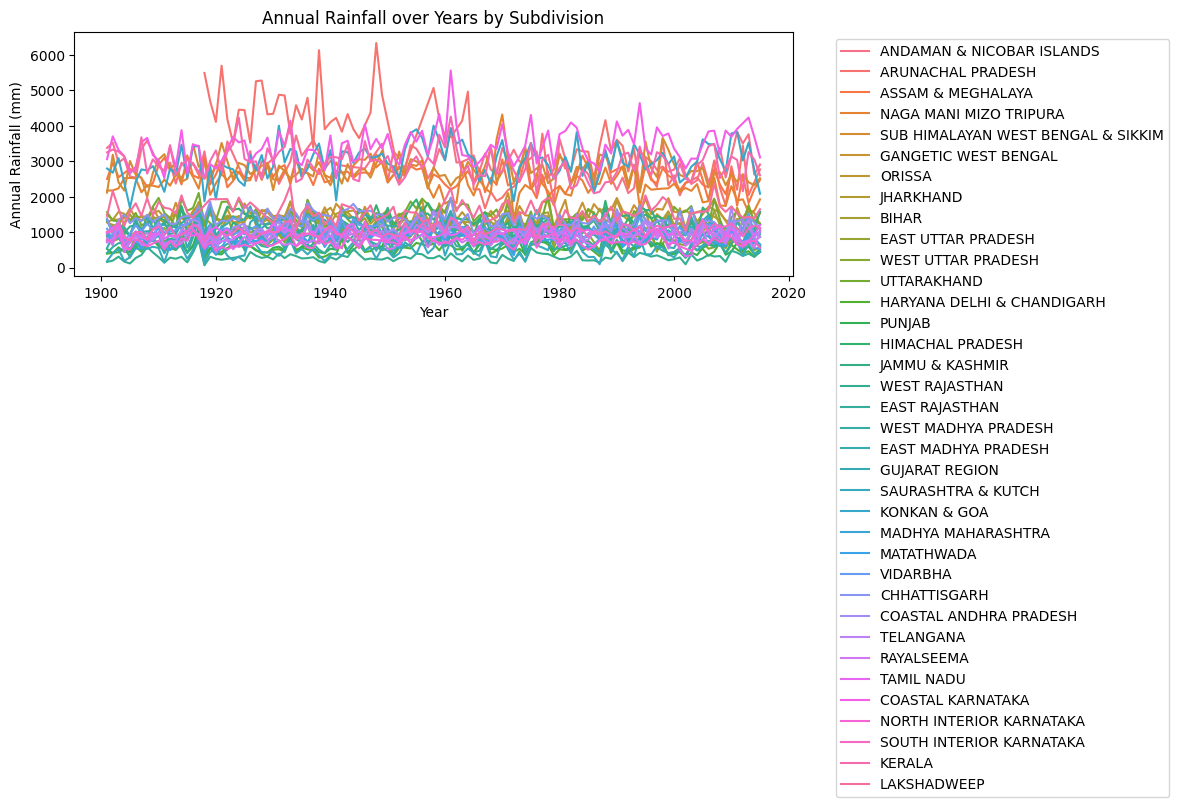

In [ ]:
# Plot of Annual Rainfall over Years by Subdivision

def barplots(x,y,hue):
    plt.figure(figsize=(12, 6)) # Increased figure size for better readability
    sns.set_palette("husl")

    # Modified to plot 'YEAR' vs 'ANNUAL' rainfall by 'SUBDIVISION'
    sns.lineplot(x=x, y=y, hue=hue, data=rainfall_data);
barplots('YEAR', 'ANNUAL', 'SUBDIVISION') # Using columns from the rainfall dataset
plt.title('Annual Rainfall over Years by Subdivision') # Added a title
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Adjusted legend position
plt.tight_layout() # Adjust layout to prevent labels overlapping

In [ ]:
# Grouping by Subdivision and calculating the total Annual Rainfall

rainfall_data.groupby('SUBDIVISION').sum()['ANNUAL'].sort_values(ascending = False).reset_index()

SUBDIVISION    ANNUAL
0                    COASTAL KARNATAKA  388558.7
1                         KONKAN & GOA  342433.9
2                               KERALA  336431.1
3   SUB HIMALAYAN WEST BENGAL & SIKKIM  316505.0
4                    ARUNACHAL PRADESH  311116.0
5            ANDAMAN & NICOBAR ISLANDS  304453.7
6                    ASSAM & MEGHALAYA  296780.0
7               NAGA MANI MIZO TRIPURA  279866.2
8                 GANGETIC WEST BENGAL  171406.1
9                          UTTARAKHAND  168555.1
10                              ORISSA  167689.5
11                         LAKSHADWEEP  163861.3
12                        CHHATTISGARH  157748.8
13                           JHARKHAND  150569.9
14                    HIMACHAL PRADESH  144939.7
15                 EAST MADHYA PRADESH  138575.0
16                               BIHAR  137727.9
17                     JAMMU & KASHMIR  129924.0
18                            VIDARBHA  125977.8
19              COASTAL ANDHRA PRADESH  121084.0
20            SOUTH INTERIOR KARNATAKA  119645.0
21                  EAST UTTAR PRADESH  112609.5
22                           TELANGANA  109638.5
23                          TAMIL NADU  108527.0
24                 WEST MADHYA PRADESH  107656.9
25                      GUJARAT REGION  105596.5
26                  MADHYA MAHARASHTRA  101226.8
27                  WEST UTTAR PRADESH   95118.2
28                          MATATHWADA   90929.6
29                          RAYALSEEMA   88113.7
30            NORTH INTERIOR KARNATAKA   82546.5
31                      EAST RAJASTHAN   75349.8
32                              PUNJAB   68256.6
33          HARYANA DELHI & CHANDIGARH   61007.1
34                  SAURASHTRA & KUTCH   56943.6
35                      WEST RAJASTHAN   33657.4

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ANNUAL'].plot(kind='hist', bins=20, title='ANNUAL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='ANNUAL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ANNUAL']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ANNUAL')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['ANNUAL'].plot(kind='line', figsize=(8, 4), title='ANNUAL')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Handling missing values by filling with the mean of each column

# Exclude non-numeric columns like 'SUBDIVISION' before calculating the mean
rainfall_data.fillna(rainfall_data.mean(numeric_only=True), inplace=True)

# Verify that there are no more missing values
print(rainfall_data.isnull().sum().sort_values(ascending=False))

index          0
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


---

# **Exploratory Data Analysis**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between Monthly Rainfall and Aggregated Rainfall with there columns.

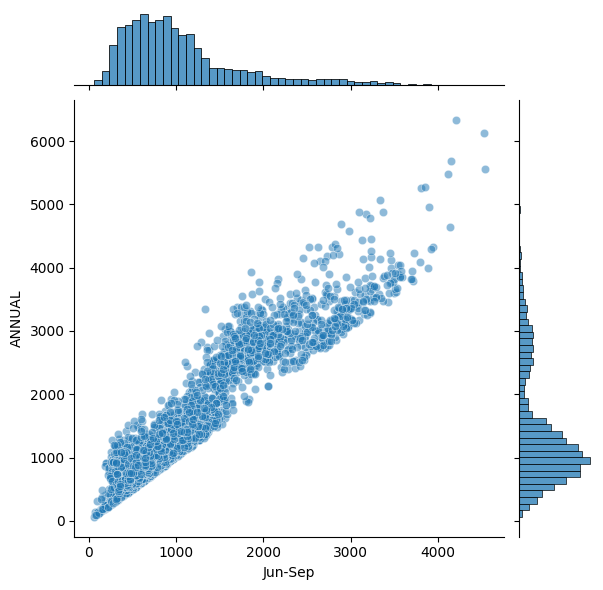

In [ ]:
# Visualization of relationship between two variables using jointplot
sns.jointplot(x='Jun-Sep', y='ANNUAL', data=data,alpha=0.5)

Text(0.5, 1.0, 'SUBDIVISION for MAR')

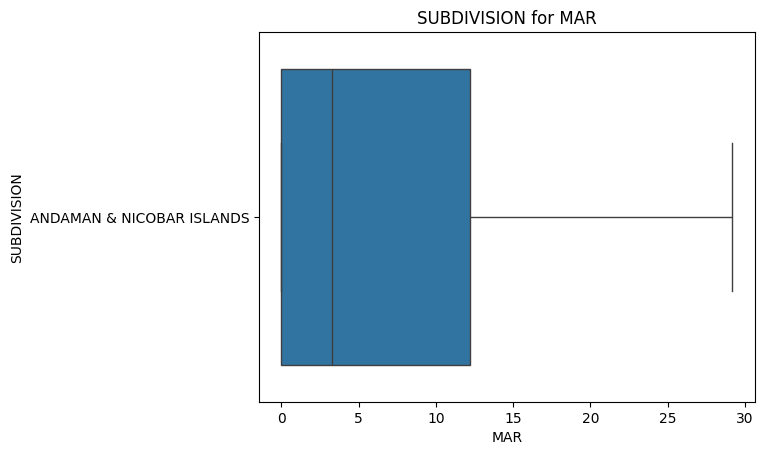

In [ ]:
# Visualization of data distribution using boxplot
sns.boxplot(x='MAR',y='SUBDIVISION',data=data.head(5))
plt.title('SUBDIVISION for MAR')

Text(0.5, 1.0, 'Plotting of simple ANNUAL')

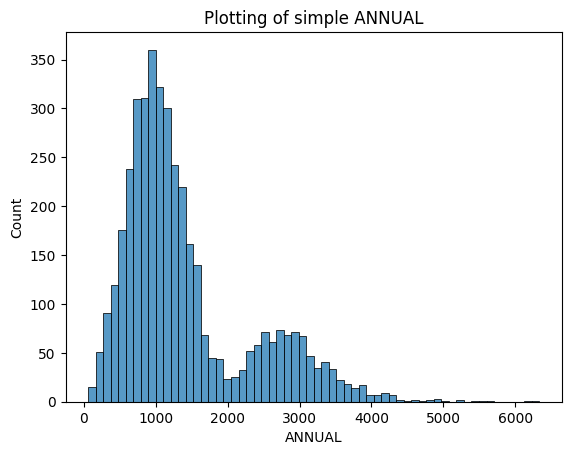

In [ ]:
# Histplot for frequency distribution
sns.histplot(x='ANNUAL',data=data)
plt.title('Plotting of simple ANNUAL')

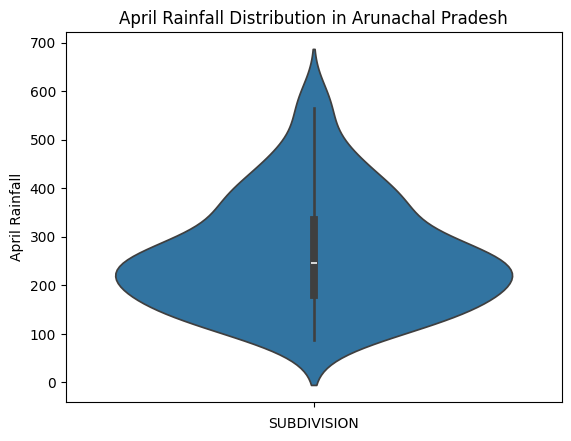

In [ ]:
# Visualization of data distribution and density using violinplot
arunachal_data = data[data['SUBDIVISION'] == 'ARUNACHAL PRADESH']
sns.violinplot(data = arunachal_data, y = 'APR')
plt.title('April Rainfall Distribution in Arunachal Pradesh')
plt.xlabel('SUBDIVISION')
plt.ylabel('April Rainfall')
plt.show()

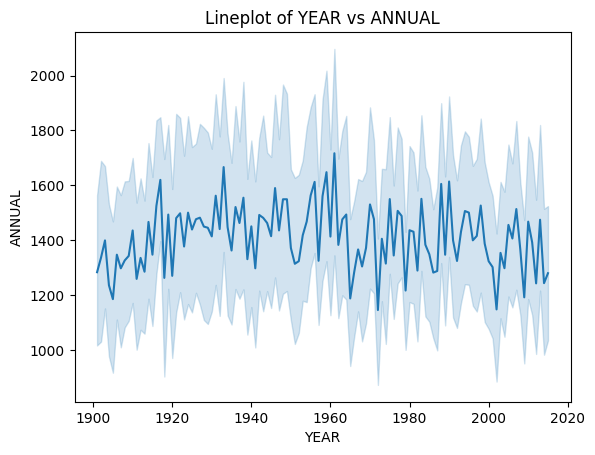

In [ ]:
# Lineplot for trend analysis
sns.lineplot(data = data, x = 'YEAR', y = 'ANNUAL')
plt.title('Lineplot of YEAR vs ANNUAL')
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.show()

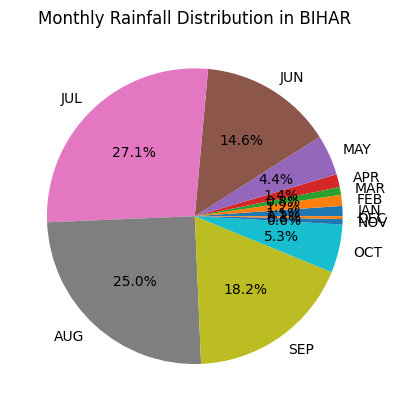

In [ ]:
# Pie chart for percentage distribution
bihar_data = data[data['SUBDIVISION'] == 'BIHAR']
monthly_rainfall = bihar_data.loc[:, 'JAN':'DEC'].sum()
name = monthly_rainfall.index
plt.pie(monthly_rainfall, labels = name, autopct = '%1.1f%%')
plt.title('Monthly Rainfall Distribution in BIHAR')
plt.show()

###Let's observe the numerical attributes distribution

In [ ]:
numeric_features = data.describe().columns
numeric_features

Index(['index', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec'],
      dtype='object')

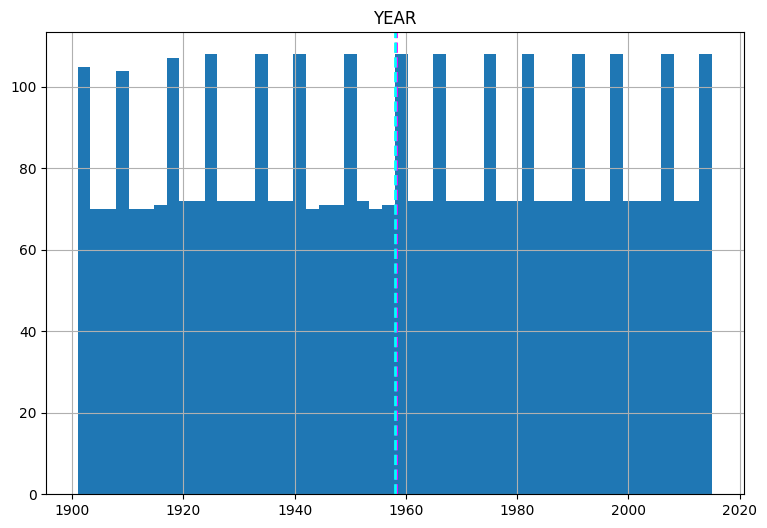

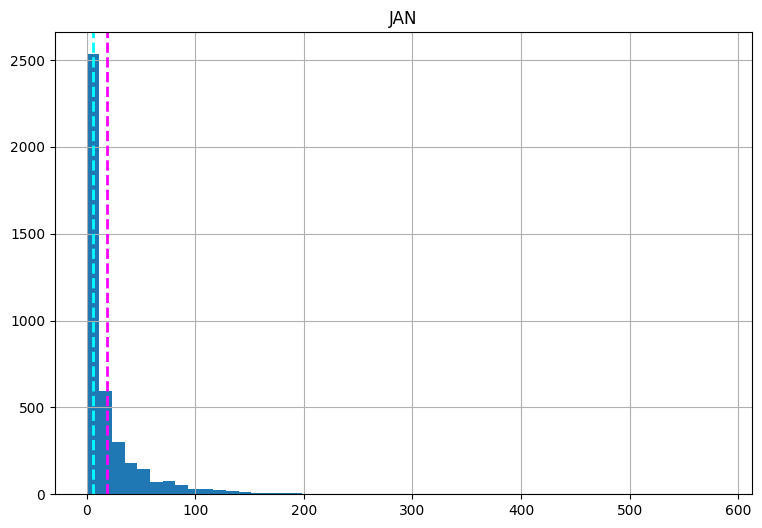

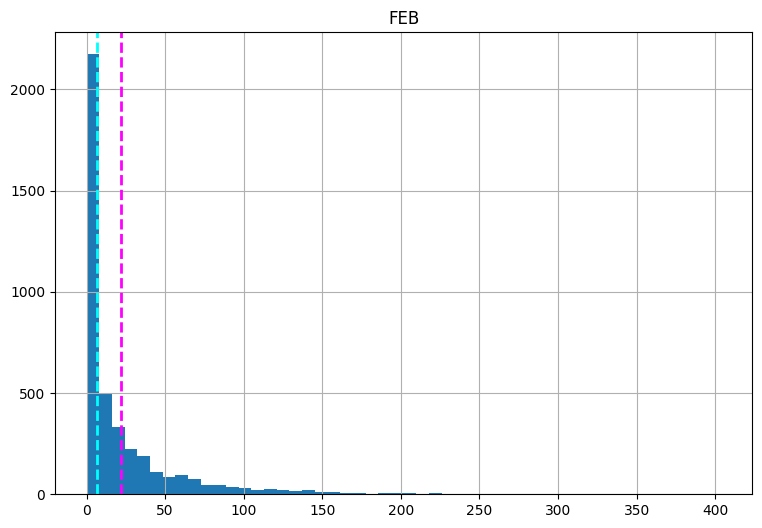

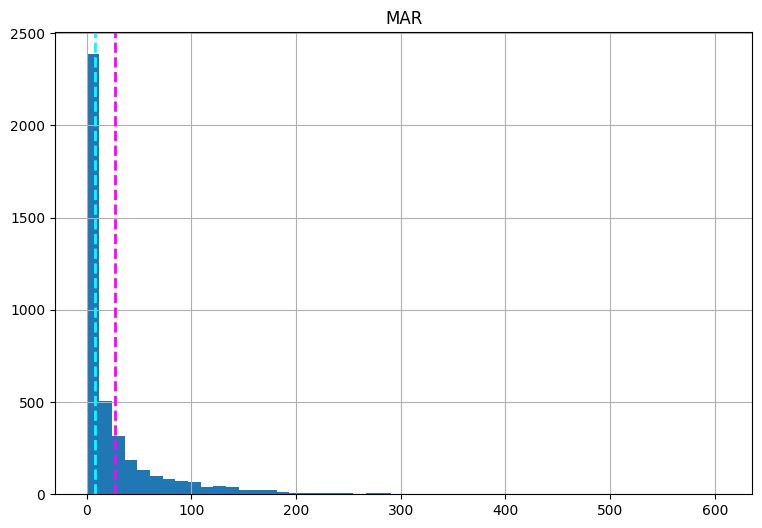

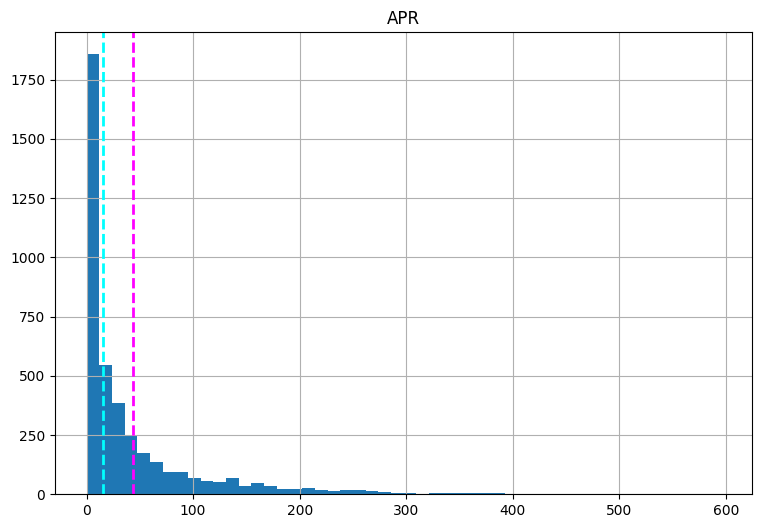

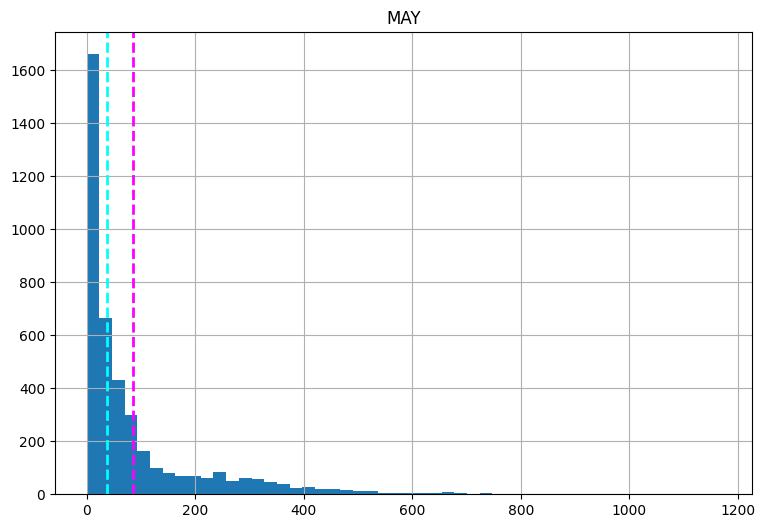

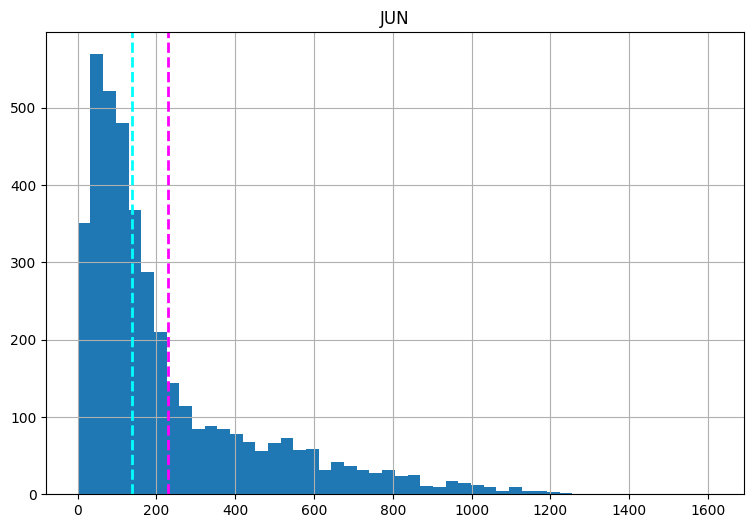

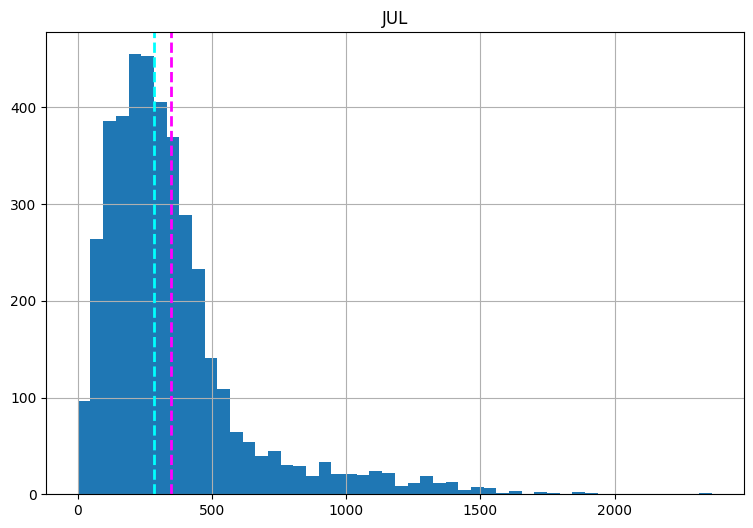

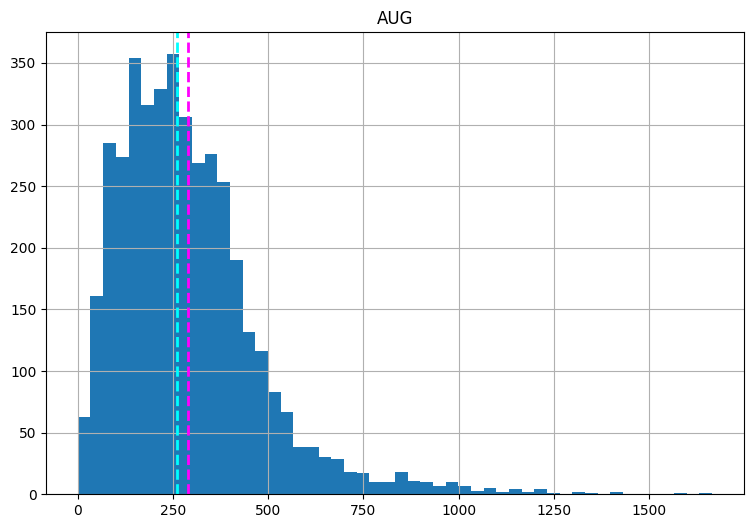

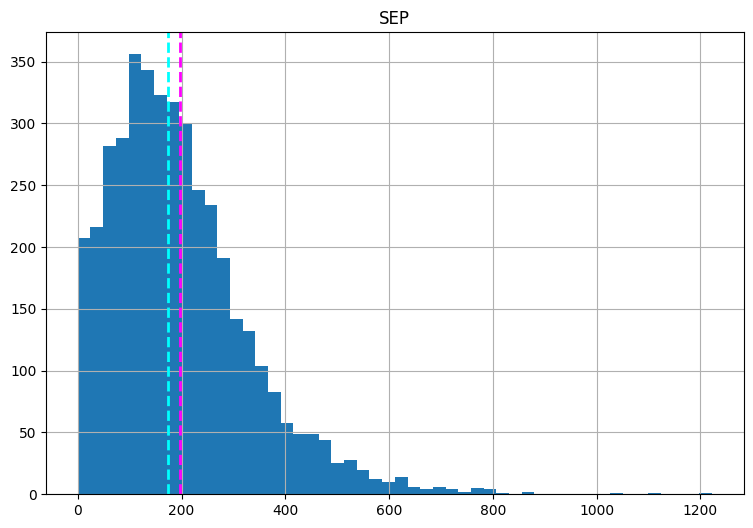

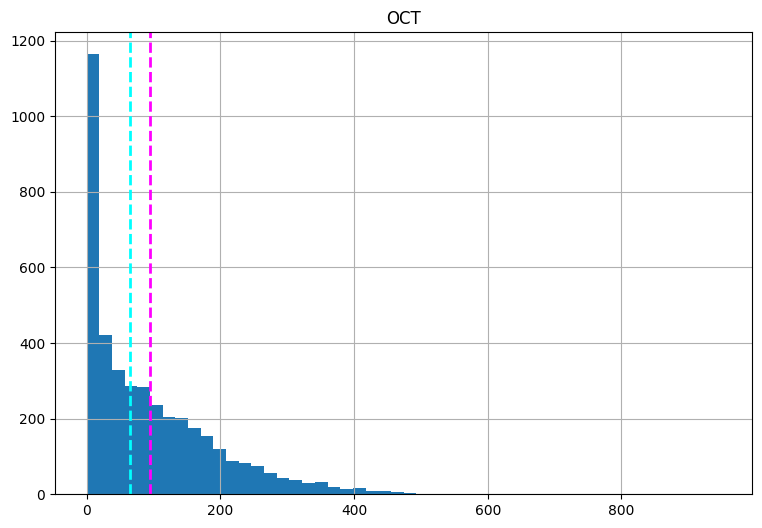

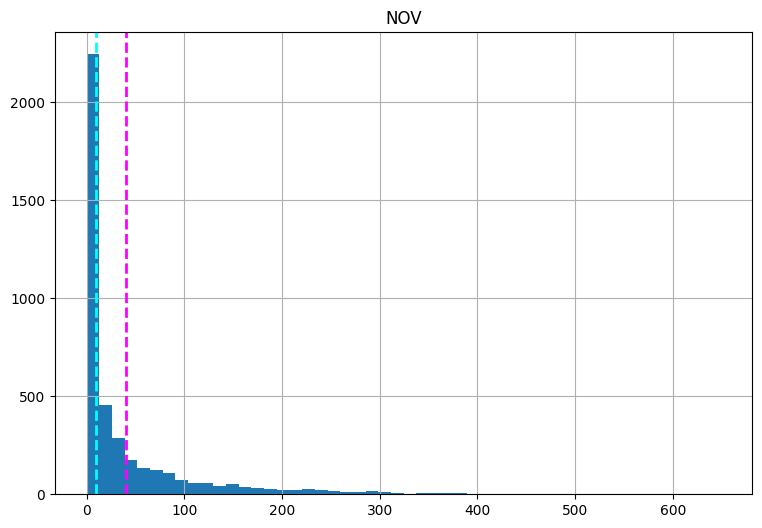

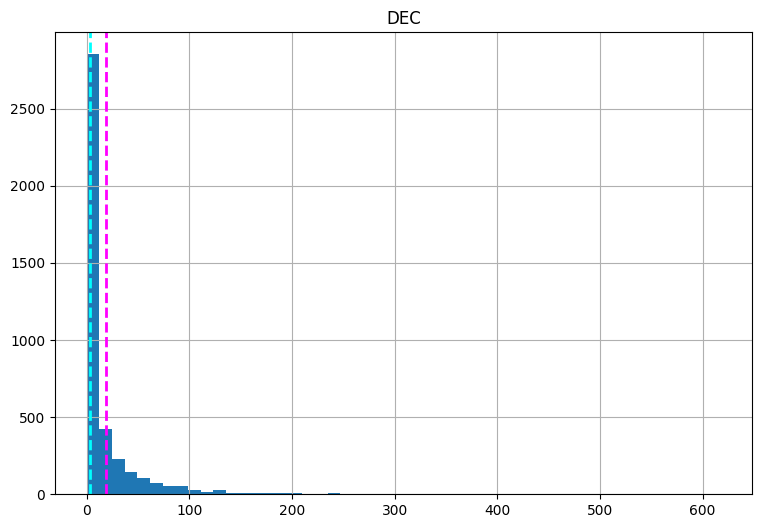

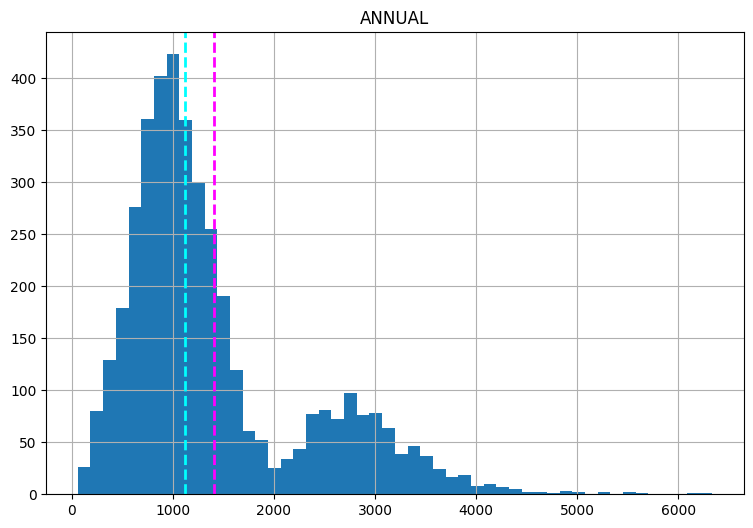

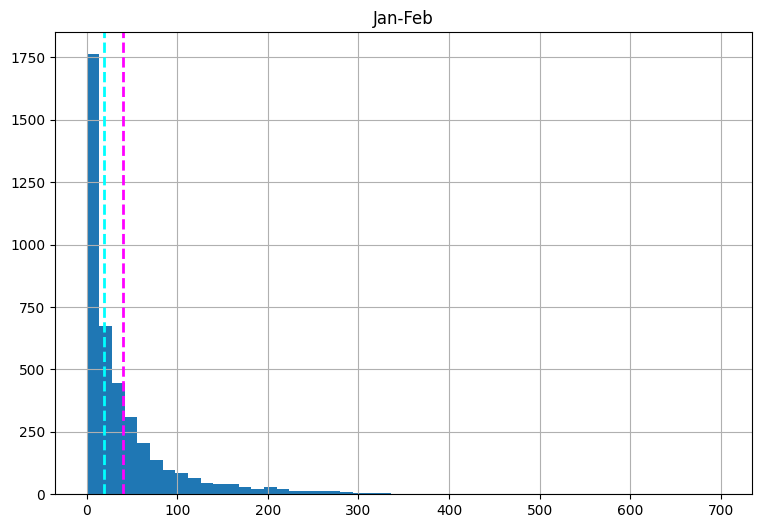

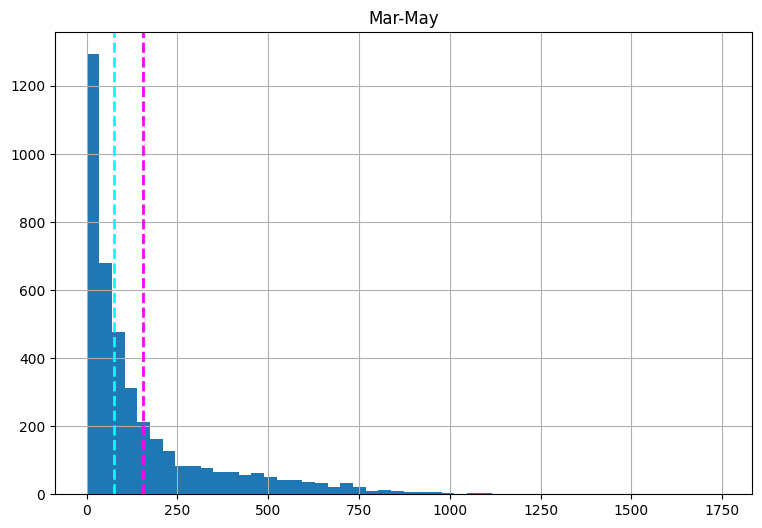

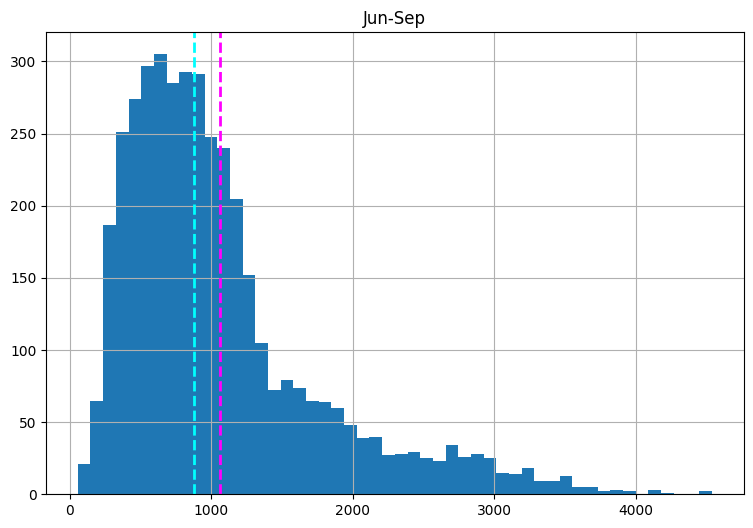

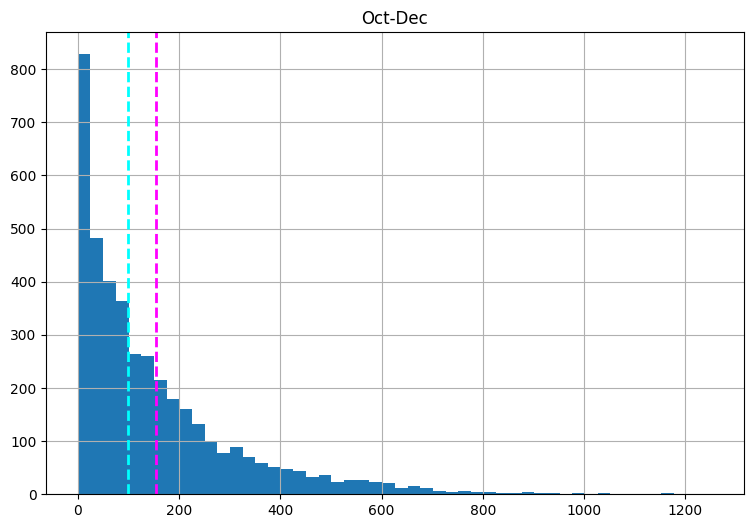

In [ ]:
# plot for numerical attributions
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

By seeing the above histogram. Some of the features that we can notice in our histograms are:

1. Some of the histograms are tail heavy.
2. All the attributes have different scales.

Both findings tell us that we will require to normalise the attributes further.

Let's check the dependent variable distribution with respect to the independent variable. like is the data distribution Linear or not.

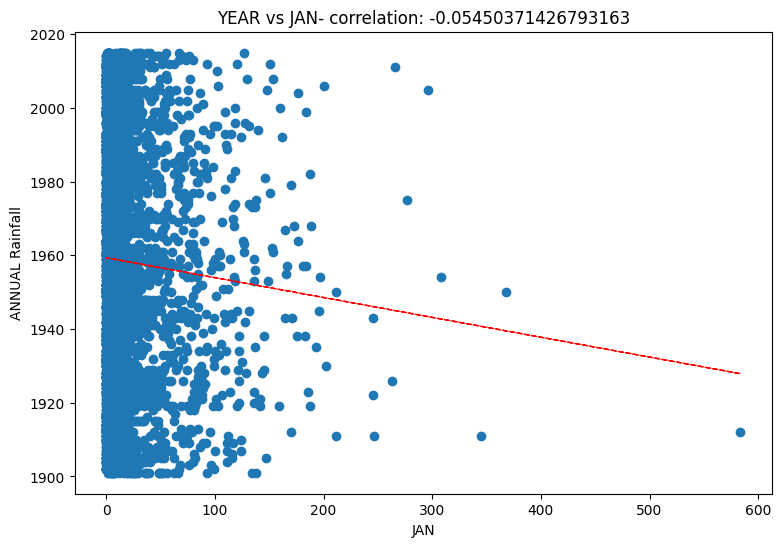

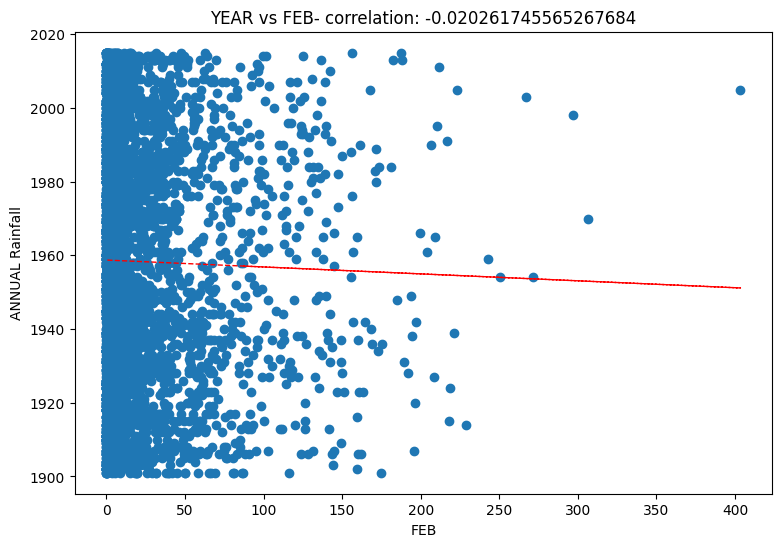

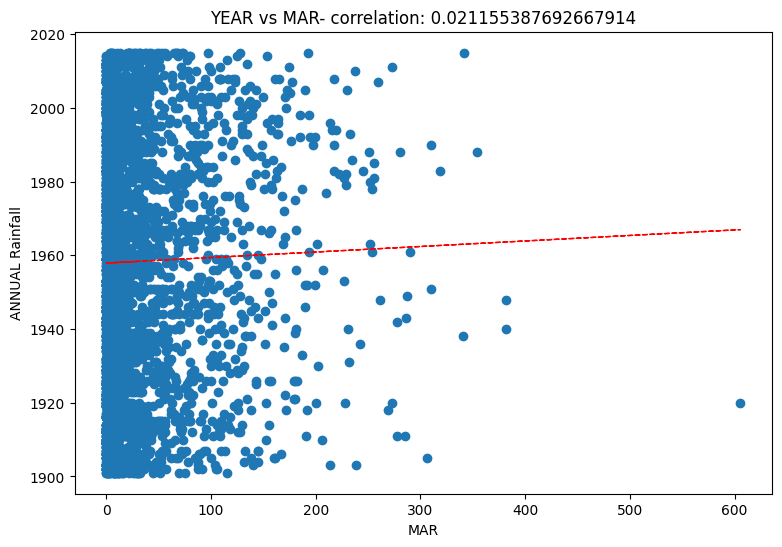

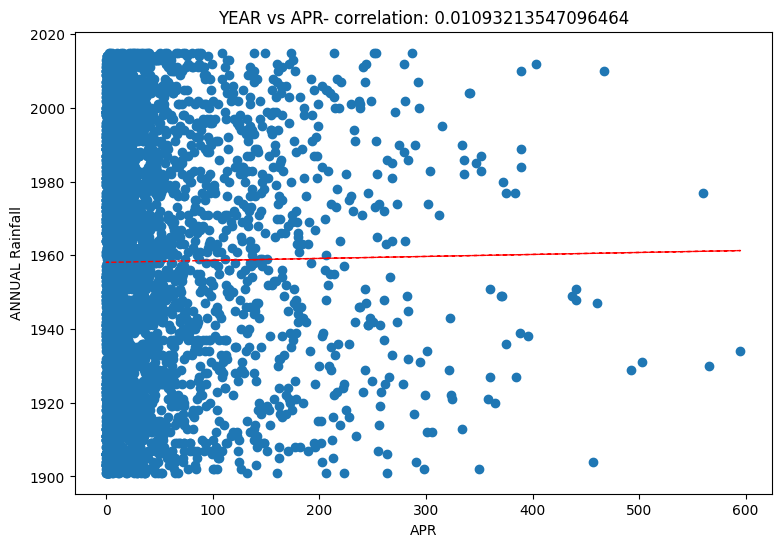

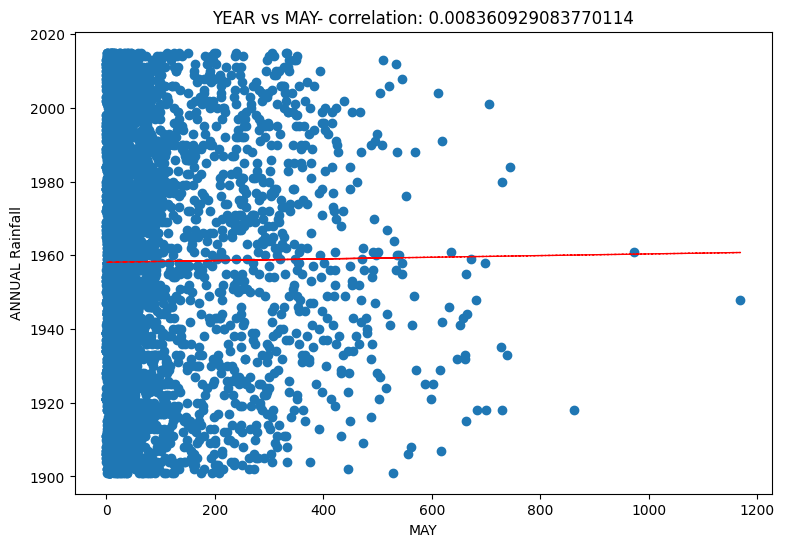

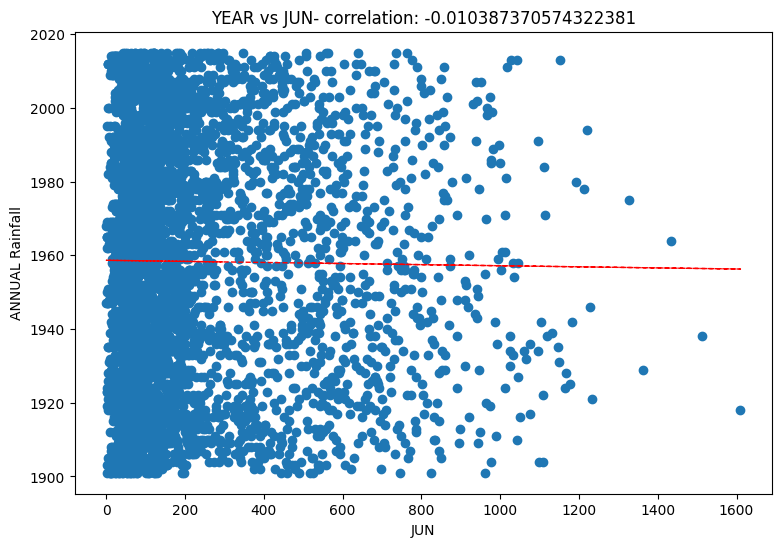

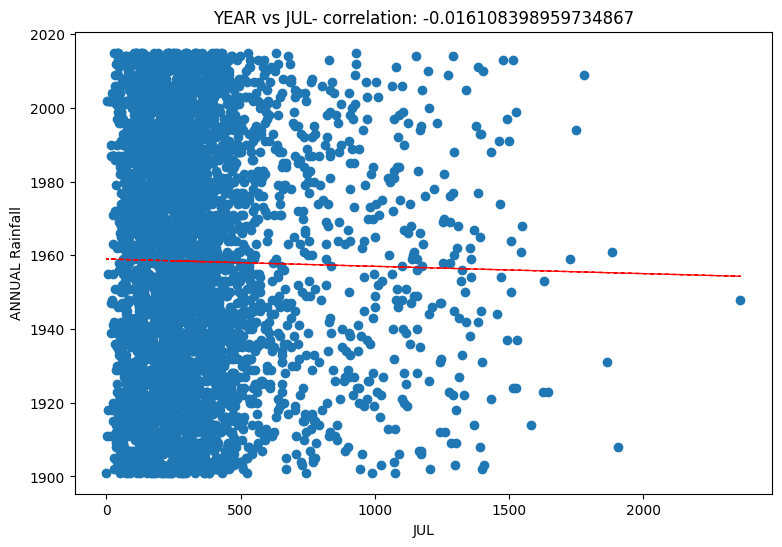

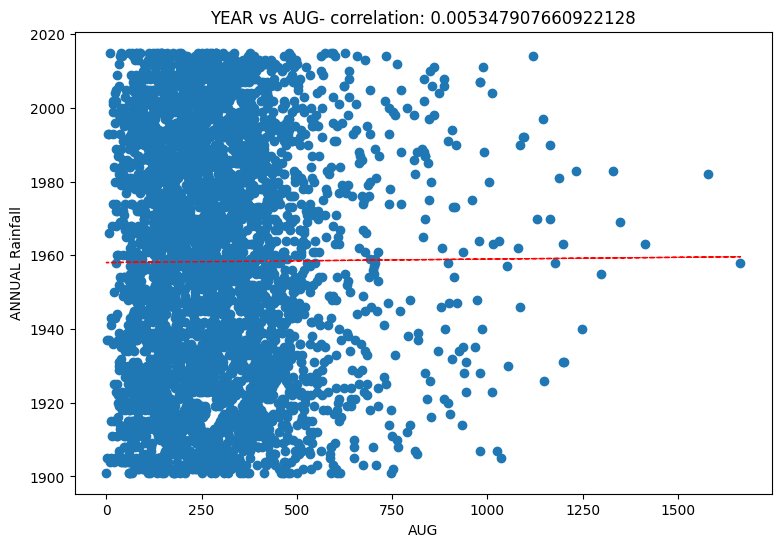

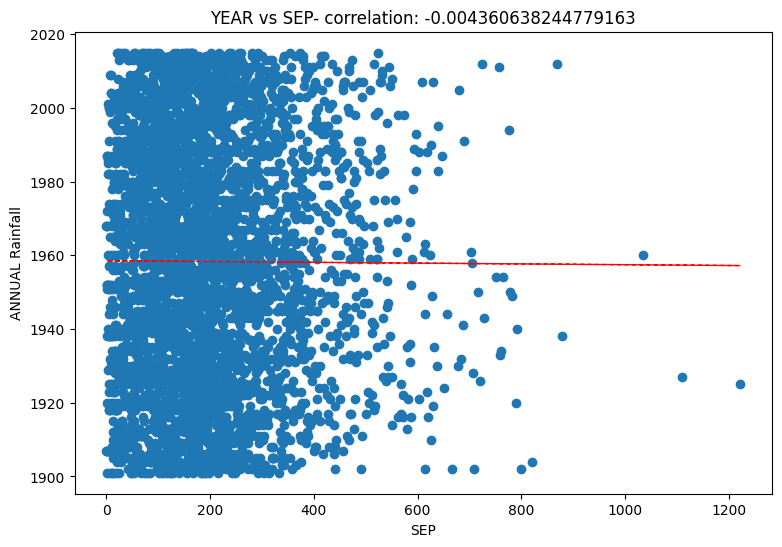

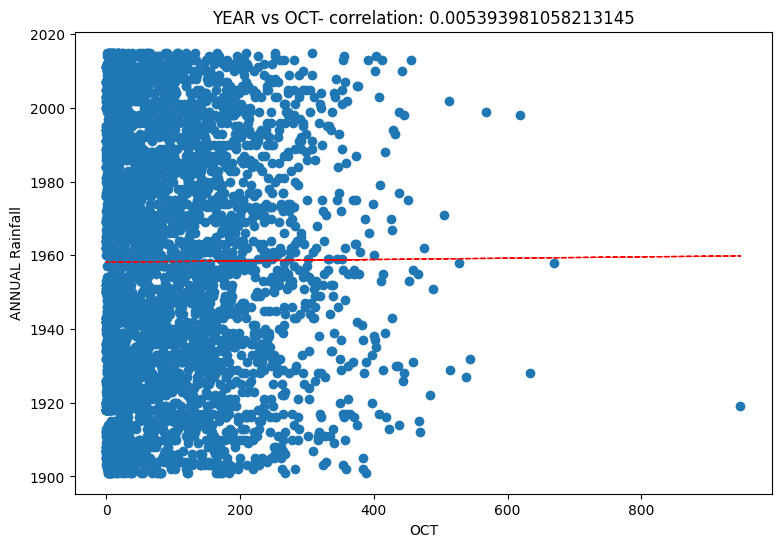

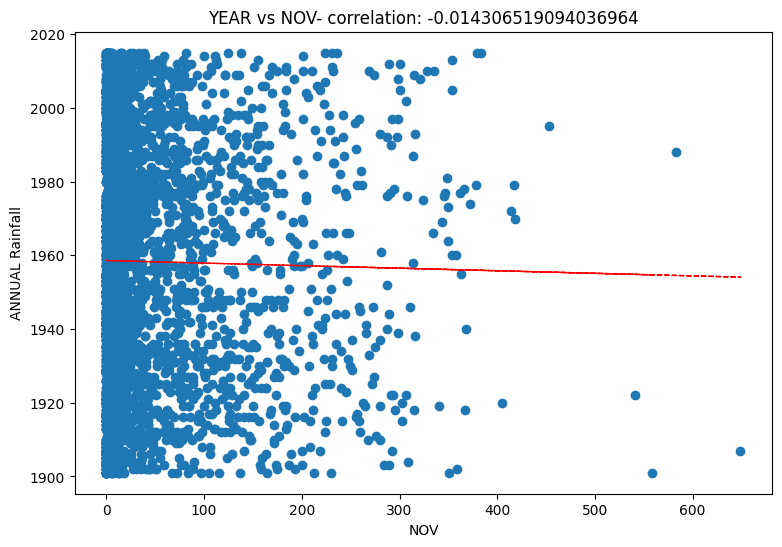

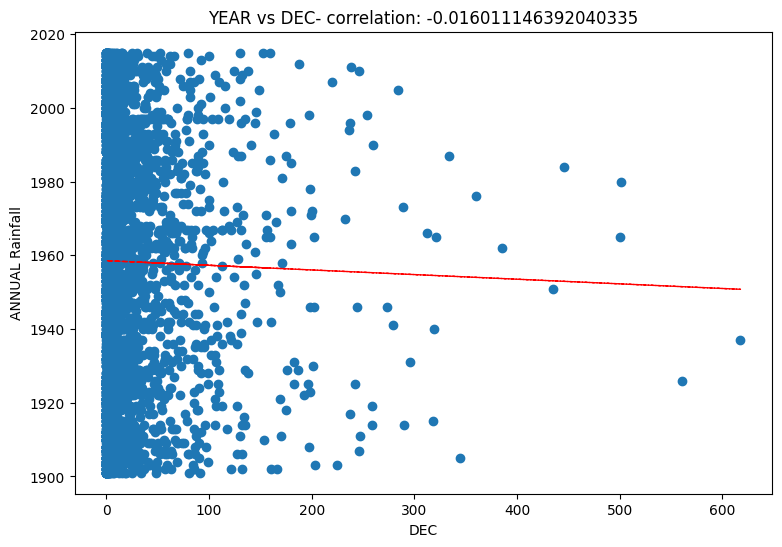

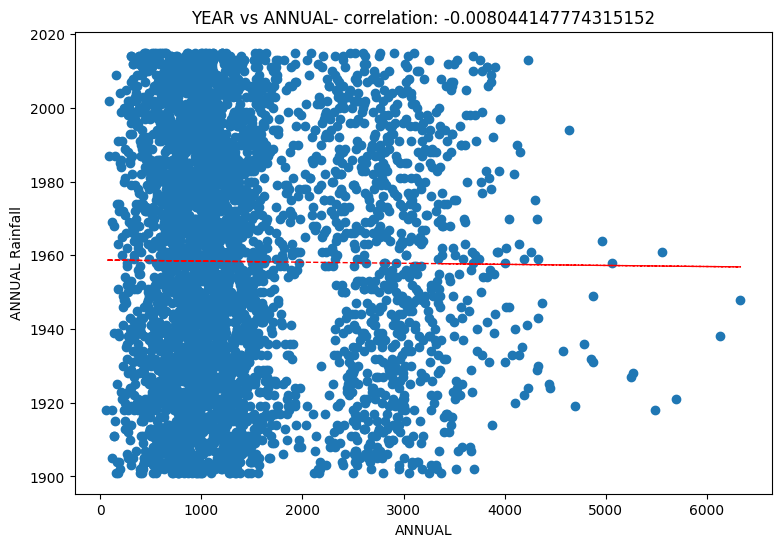

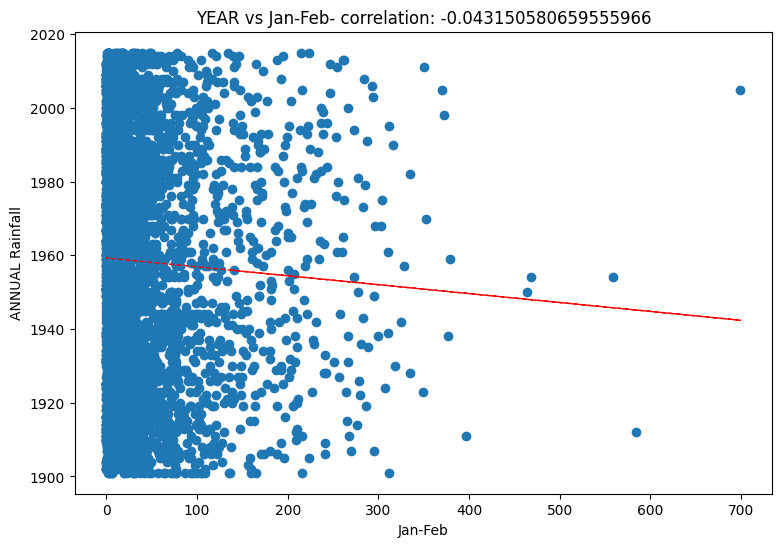

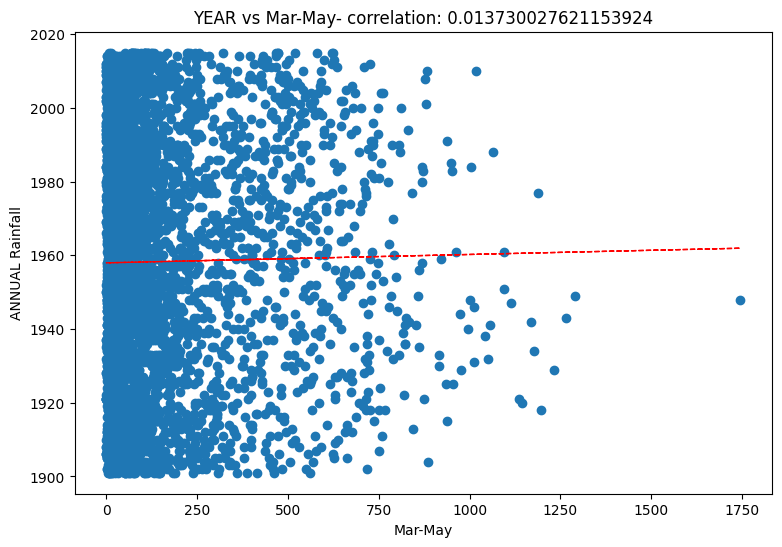

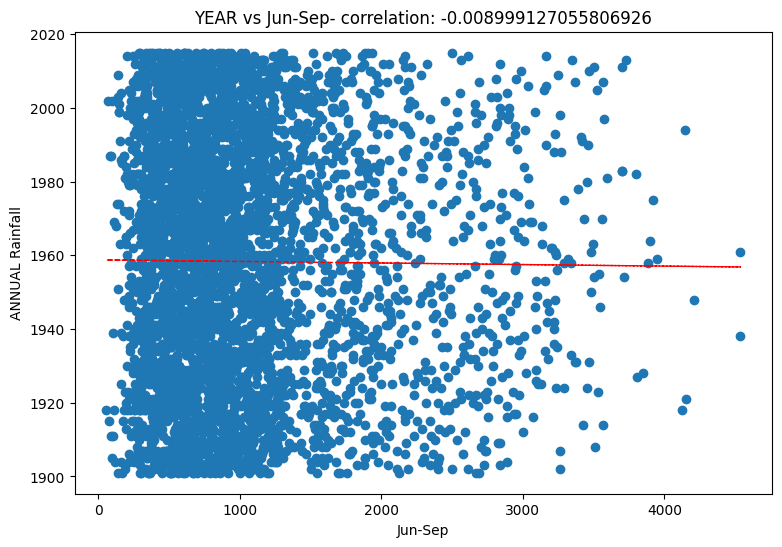

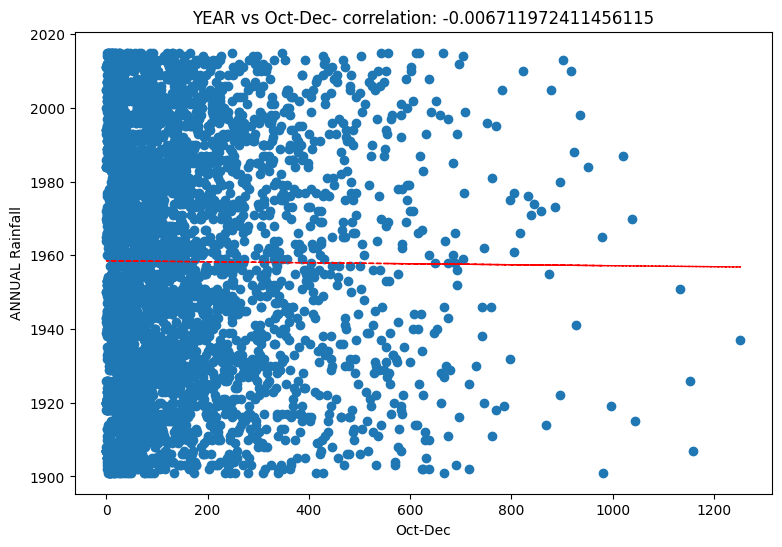

In [ ]:
# to check the data distribution
# Drop rows with missing values in the relevant columns for polyfit
df_cleaned = data.dropna(subset=numeric_features[2:])

for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_cleaned[col]
    label = df_cleaned['YEAR']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('ANNUAL Rainfall')
    ax.set_title('YEAR vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_cleaned[col], df_cleaned['YEAR'], 1)
    y_hat = np.poly1d(z)(df_cleaned[col])

    plt.plot(df_cleaned[col], y_hat, "r--", lw=1)

plt.show()

From the above distribution we can conclude that some data are not linearly distributed with respect to dependent variable and nearly linearly related and rainfall data is negatively linearly related. so we need to prepare the data by make some transformation before applying the model.

### Checking Correlation Of Data
Correlation is a statistical measure that expresses the strength of the relationship between two variables.

The two main types of correlation : positive and negative.

Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends.

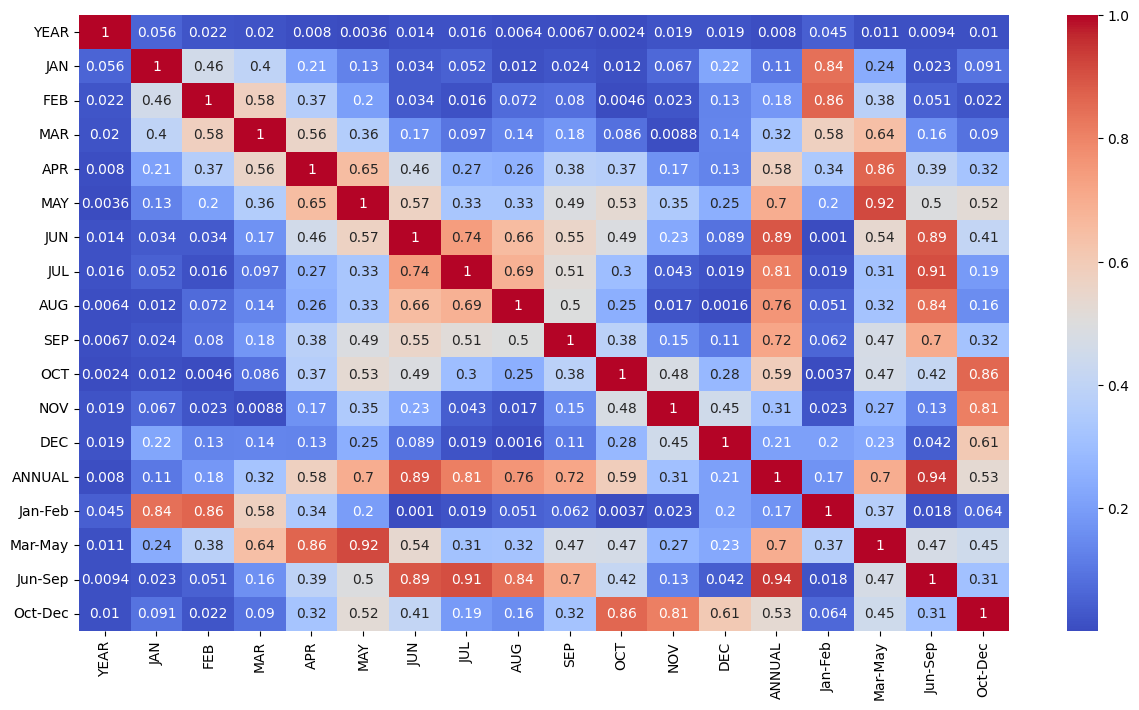

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.drop(columns=['SUBDIVISION', 'index']).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

ANNUAL and Jun-Sep are almost 0.94 correlated, So it's generate multicollinearity issue. so we drop Jun-Sep feature

In [ ]:
#Drop Jun-Sep from dataset df1
data.drop(columns=['Jun-Sep'],inplace=True)

---

# 📊 **Data Preparation**

In this section, the dataset is cleaned, transformed, and prepared for analysis.  
A copy of the dataset is created to ensure the original data remains intact during preprocessing.


In [ ]:
# Create a copy of dataset before handling data

rainfall_data = data.copy()

### 🔹 **Identifying Numerical & Categorical Features**
We classify the dataset into **numerical features** (rainfall values, year) and **categorical features** (region/subdivision).


In [ ]:
# Identifying Numerical & Categorical Variables

# Extract numerical features (rainfall values + year column)
numeric_features = rainfall_data.select_dtypes(include=['float64','int64']).columns
print("Numerical Features:", numeric_features.tolist())

# Extract categorical features (like subdivision/region names)
categorical_features = rainfall_data.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_features.tolist())



Numerical Features: ['index', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Oct-Dec']
Categorical Features: ['SUBDIVISION']


In [ ]:
# 🔹 Checking for Missing Values

# Count missing values in each column
missing_values = rainfall_data.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)


Missing Values in Dataset:
 index           0
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Oct-Dec        13
dtype: int64


### 🔹 **Categorical Variables**
The `SUBDIVISION` column contains categorical data representing regions of India.  
We extract and review it.


In [ ]:
# 🔹 Exploring Categorical Variables

# Check unique regions/subdivisions
print("Unique Subdivisions:\n", rainfall_data['SUBDIVISION'].unique())

# Total number of unique subdivisions
print("Total Subdivisions:", rainfall_data['SUBDIVISION'].nunique())



Unique Subdivisions:
 ['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']
Total Subdivisions: 36


### 🔹 **Average Annual Rainfall by Subdivision**
We calculate the mean **annual rainfall** for each subdivision to understand regional variations.


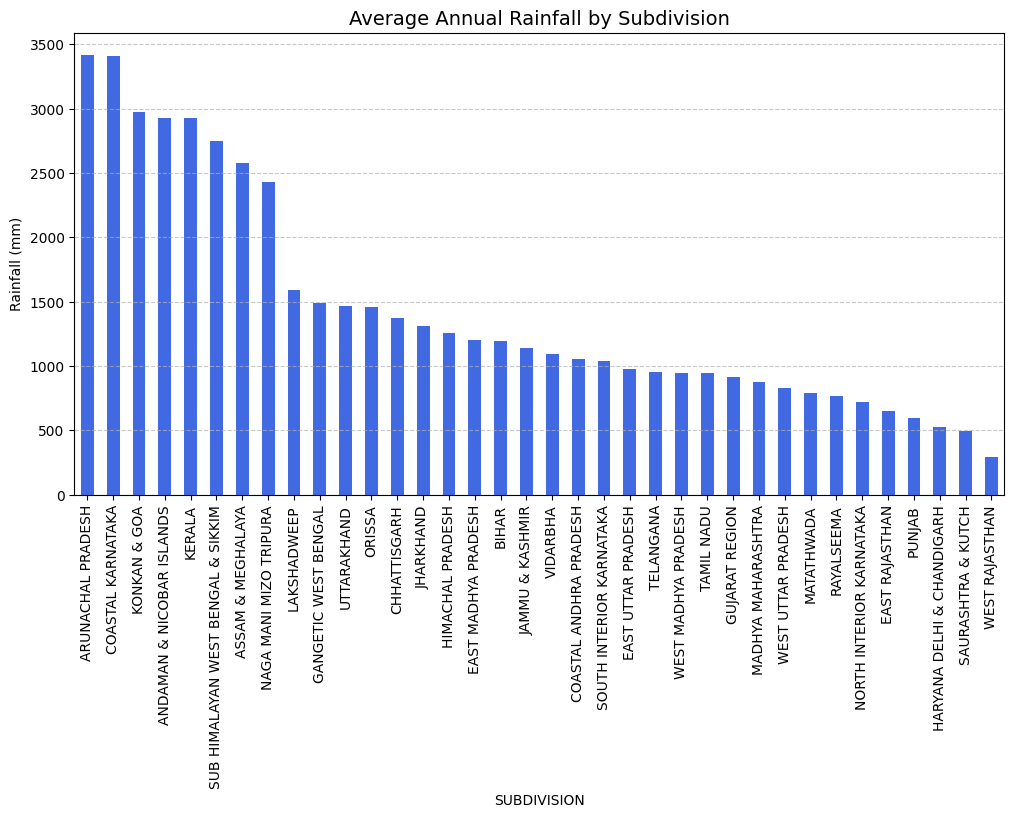

In [ ]:
# 🔹 Average Annual Rainfall by Subdivision

# Group by subdivision and calculate mean annual rainfall
region_rainfall = rainfall_data.groupby('SUBDIVISION')['ANNUAL'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
region_rainfall.plot(kind='bar', color='royalblue')
plt.title("Average Annual Rainfall by Subdivision", fontsize=14)
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 🔹 **Annual Rainfall Trend Over Time**
We analyze rainfall changes across **years** to identify long-term patterns and anomalies.


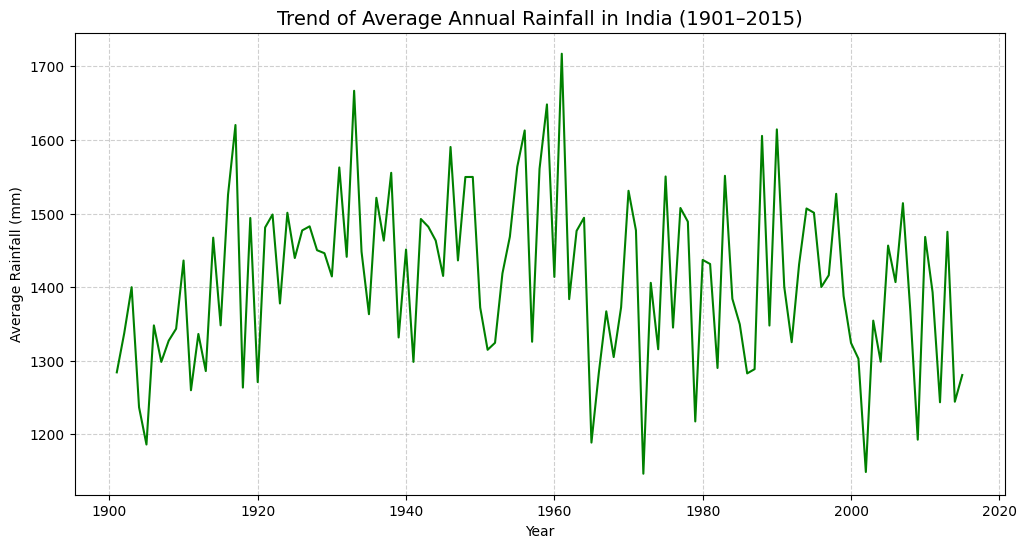

In [ ]:
# 🔹 Annual Rainfall Trend Over Time

# Calculate mean annual rainfall across all subdivisions for each year
annual_trend = rainfall_data.groupby('YEAR')['ANNUAL'].mean()

# Plot line graph
plt.figure(figsize=(12,6))
plt.plot(annual_trend.index, annual_trend.values, color='green')
plt.title("Trend of Average Annual Rainfall in India (1901–2015)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



### 🔹 **Seasonal Rainfall Analysis**
We examine rainfall distribution across **seasons** (Jan–Feb, Oct–Dec).


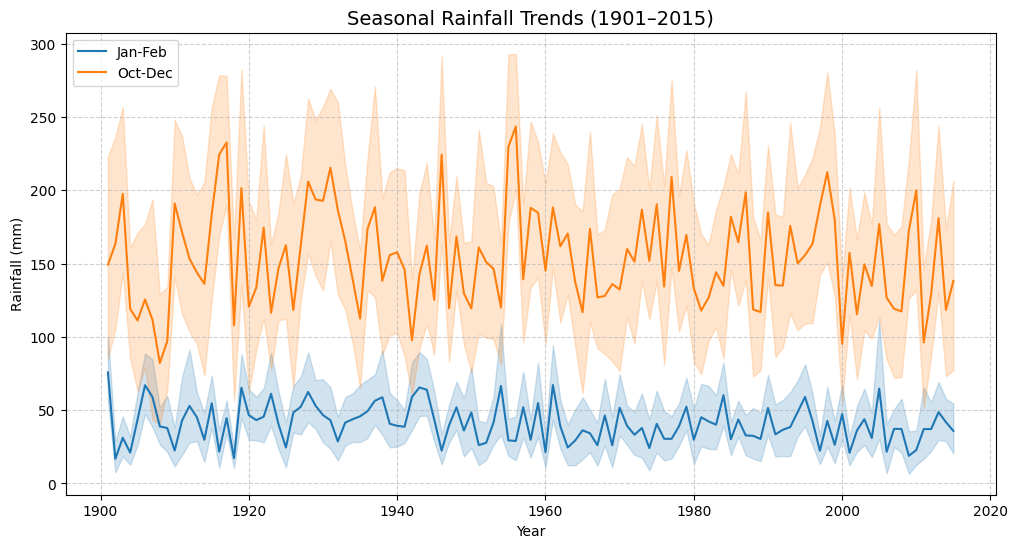

In [ ]:
# 🔹 Seasonal Rainfall Analysis

# Select seasonal columns (rainfall in different parts of the year)
seasonal_cols = ["Jan-Feb", "Oct-Dec"]

# Plot seasonal rainfall trends
plt.figure(figsize=(12,6))
for col in seasonal_cols:
    sns.lineplot(data=rainfall_data, x="YEAR", y=col, label=col)

plt.title("Seasonal Rainfall Trends (1901–2015)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### ✅ **Summary**
- **Categorical Variable:** `SUBDIVISION` (regional grouping).  
- **Time Variable:** `YEAR` (used for temporal analysis).  
- **Numerical Variables:** Monthly rainfall, seasonal rainfall, and `ANNUAL`.  

This preparation ensures the dataset is clean and structured for **feature engineering** and **prediction modeling**.


---

# 📌 **Feature Engineering On Data**

1. Handle categorical / numerical columns  
2. Identify Inputs and Target  
3. Scale rainfall values into a (0,1) range  


### 🔹 **Checking Dataset (Preview)**


In [ ]:
# Display first few rows

rainfall_data.head()



index                SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY  \
0      0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8   
1      1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1   
2      2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1   
3      3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5   
4      4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5   

     JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Oct-Dec  
0  517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    980.3  
1  537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    716.7  
2  479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    690.6  
3  495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    571.0  
4  628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    630.8

### 🔹 **Understanding the Columns**
- `YEAR` → Timeline reference (not used as feature)  
- State/UT columns → Rainfall data (features)  
- `ANNUAL` → Target variable (Total Annual Rainfall)  


### 🔹 **Defining Inputs and Target**


In [ ]:
# Define features (X) and target (y)
X = rainfall_data.drop(columns=["YEAR", "ANNUAL"])
y = rainfall_data["ANNUAL"]

# Shapes of input and target
print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (4116, 16)
Target Shape: (4116,)


### 🔹 **Scaling Rainfall Data**
Rainfall values differ across states (some very high, some very low).  
To balance their impact, we normalize them into a (0,1) range using **MinMaxScaler**.  


In [ ]:
# Identify numerical columns to scale (excluding 'SUBDIVISION')
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply MinMax Scaling on numerical feature columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Convert back to DataFrame for readability, keeping the 'SUBDIVISION' column
X_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)

# Concatenate the scaled numerical features with the original 'SUBDIVISION' column
X_scaled = pd.concat([X_scaled, X['SUBDIVISION']], axis=1)

X_scaled.head()

index       JAN       FEB       MAR       APR       MAY       JUN  \
0  0.000000  0.084290  0.215861  0.048217  0.003865  0.452507  0.321280   
1  0.000243  0.000000  0.396035  0.020145  0.000000  0.381739  0.333458   
2  0.000486  0.021758  0.356877  0.000000  0.001680  0.201181  0.297919   
3  0.000729  0.016104  0.036431  0.000000  0.340111  0.260568  0.307363   
4  0.000972  0.002227  0.000000  0.005449  0.045202  0.239175  0.390370   

        JUL       AUG       SEP       OCT       NOV       DEC   Jan-Feb  \
0  0.154520  0.289018  0.272117  0.409680  0.860225  0.054413  0.194853   
1  0.096877  0.452781  0.545135  0.207951  0.553244  0.259919  0.228449   
2  0.308278  0.196263  0.277355  0.191079  0.438280  0.364372  0.224017   
3  0.212460  0.096179  0.671332  0.234314  0.475728  0.064939  0.034453   
4  0.156044  0.198546  0.242982  0.274913  0.039143  0.558219  0.001858   

    Oct-Dec                SUBDIVISION  
0  0.782675  ANDAMAN & NICOBAR ISLANDS  
1  0.572216  ANDAMAN & NICOBAR ISLANDS  
2  0.551377  ANDAMAN & NICOBAR ISLANDS  
3  0.455888  ANDAMAN & NICOBAR ISLANDS  
4  0.503633  ANDAMAN & NICOBAR ISLANDS

###✅ **Final Notes:**

- Inputs (`X_scaled`) → Normalized rainfall data of States/UTs  
- Target (`y`) → Annual Rainfall  
- Data is now ready for **Train-Test Split** (next part).  


---

# 📊 **Checking Distribution and Outliers in the Rainfall Dataset**
In this section, we will:
1. Visualize the distribution of rainfall values.
2. Perform normality checks using histograms and probability plots.
3. Apply transformations if necessary to achieve near-normal distributions.
4. Detect outliers using the Interquartile Range (IQR) method.


In [ ]:
# 📌 Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Select only rainfall feature columns (excluding YEAR and ANNUAL for now)
rainfall_features = rainfall_data.drop(columns=["YEAR", "ANNUAL"])


### **1. Boxplot of Rainfall Features**
Boxplots help visualize the spread of rainfall values and detect possible outliers.


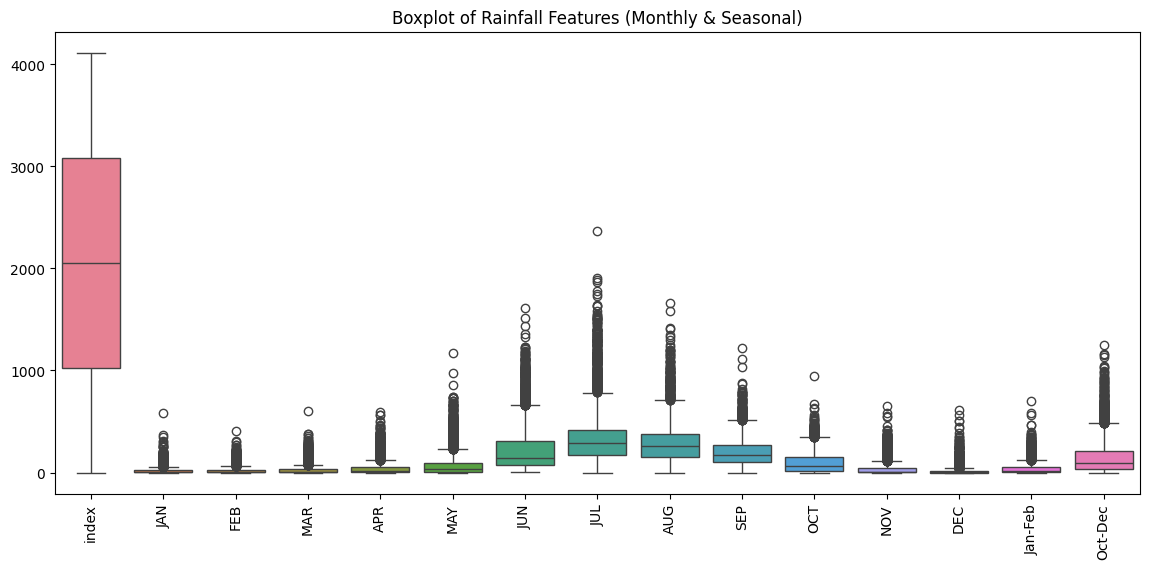

In [ ]:
# 📌 Plot boxplots for rainfall features

plt.figure(figsize=(14,6))
sns.boxplot(data=rainfall_features)
plt.xticks(rotation=90)
plt.title("Boxplot of Rainfall Features (Monthly & Seasonal)")
plt.show()


### **2. Target Variable (`ANNUAL`) Distribution Analysis**
We will check the distribution of the annual rainfall to see whether it follows a normal distribution.


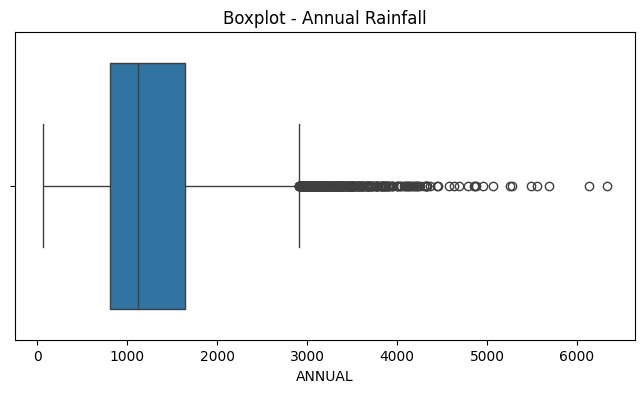

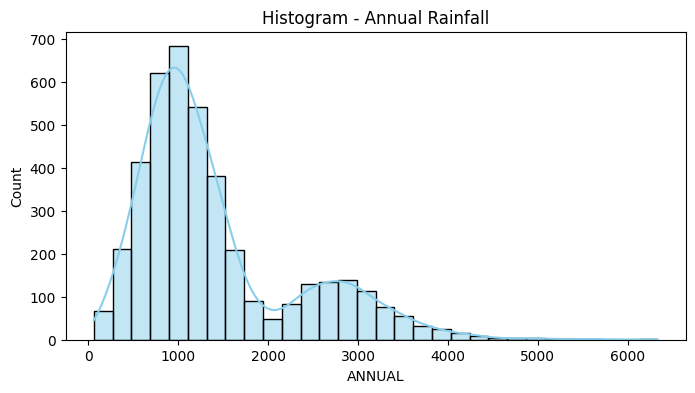

In [ ]:
# Boxplot of Annual Rainfall
plt.figure(figsize=(8,4))
sns.boxplot(x=rainfall_data["ANNUAL"])
plt.title("Boxplot - Annual Rainfall")
plt.show()

# Histogram of Annual Rainfall
plt.figure(figsize=(8,4))
sns.histplot(rainfall_data["ANNUAL"], bins=30, kde=True, color="skyblue")
plt.title("Histogram - Annual Rainfall")
plt.show()


### **3. Log Transformation (if skewed)**
If the annual rainfall is skewed, a log transformation can make the distribution more balanced.


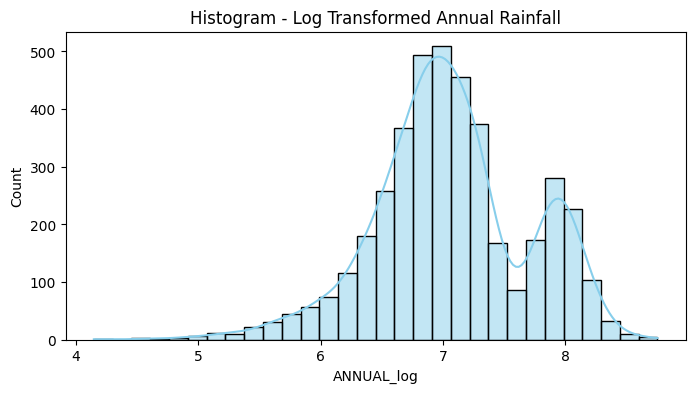

In [ ]:
# Apply log transformation (adding 1 to avoid log(0))
rainfall_data["ANNUAL_log"] = np.log1p(rainfall_data["ANNUAL"])

# Histogram of Log Transformed Annual Rainfall
plt.figure(figsize=(8,4))
sns.histplot(rainfall_data["ANNUAL_log"], bins=30, kde=True, color="skyblue")
plt.title("Histogram - Log Transformed Annual Rainfall")
plt.show()


### **4. Outlier Detection using IQR**
We use the Interquartile Range (IQR) method to identify and detect extreme rainfall values.


Number of outliers in Annual Rainfall: 396


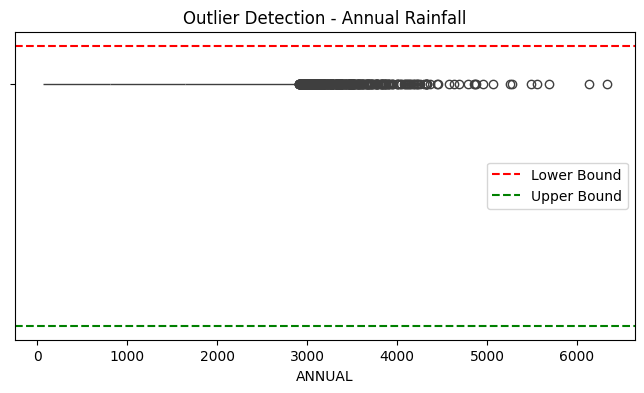

In [ ]:
# Calculate IQR for ANNUAL rainfall
Q1 = rainfall_data["ANNUAL"].quantile(0.25)
Q3 = rainfall_data["ANNUAL"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = rainfall_data[(rainfall_data["ANNUAL"] < lower_bound) | (rainfall_data["ANNUAL"] > upper_bound)]

print("Number of outliers in Annual Rainfall:", len(outliers))

# Visualize outliers with boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=rainfall_data["ANNUAL"])
plt.axhline(lower_bound, color="red", linestyle="--", label="Lower Bound")
plt.axhline(upper_bound, color="green", linestyle="--", label="Upper Bound")
plt.title("Outlier Detection - Annual Rainfall")
plt.legend()
plt.show()


###✅ **Final Notes:**

We analyzed the rainfall data using **boxplots** and **histograms** to study distributions and detect **outliers**.  
Log transformation was applied to reduce skewness, and the **IQR method** was used for outlier detection.  
This helps in preparing cleaner data for further analysis.  


# **Spliting Training and Testing Set**

In [ ]:
#Applying LabelEncording
#Encode labels of multiple columns at ones using LabelEncoder
label_data= data.apply(LabelEncoder().fit_transform)

In [ ]:
#defining X and y variable or independent and dependent variable
X=label_data.drop('ANNUAL',axis=1)
y=label_data['ANNUAL']

In [ ]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Check the shape of train and test datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (3292, 19)
X_test shape : (824, 19)
y_train shape: (3292,)
y_test shape : (824,)


In [ ]:
# Check the length of train and test datasets
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

3292
3292
824
824


# **Model selection and training**

# Linear Regression :
Considering that we are tackling a regression problem, a good start is to fit a linear regression model.

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It is a fundamental technique in the field of statistics and machine learning for predicting or understanding the relationship between variables.

In simple linear regression, there is a single independent variable and a single dependent variable. The goal is to find the best-fitting linear line (or hyperplane, in higher dimensions) that minimizes the difference between the predicted values and the actual observed values.

In [ ]:
# Create a linear Regression model
lr = LinearRegression()

In [ ]:
# Train the model on the traning set (This is how the model will learn.).
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# define the prediction
def predict(ml_model,x,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    x_train = rob.fit_transform(X_train)
    x_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(x_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}')


R^2 is -4.196362383393298
 Adj R^2 is 0.9673141151945596
 RMSE is: 188.27226294830544


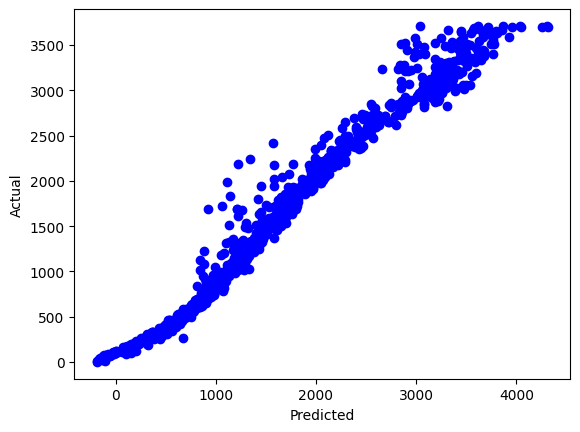

In [ ]:
predict(LinearRegression(),X,y)

In [ ]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(" Linear Regression Results:")
print("R² Score:", r2)
print("Adjusted R²:", adj_r2)
print("RMSE:", rmse)
print("MAE:", mae)

 Linear Regression Results:
R² Score: 0.97401489797488
Adjusted R²: 0.973400822180754
RMSE: 173.8400514458218
MAE: 132.3947902448467


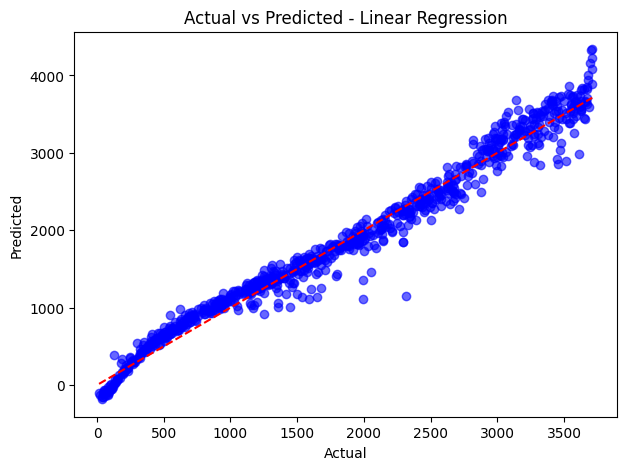

In [ ]:
# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=6)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

R^2 is -2.968499561233377
 Adj R^2 is 0.9779651811917095
 RMSE is: 154.58272599083406


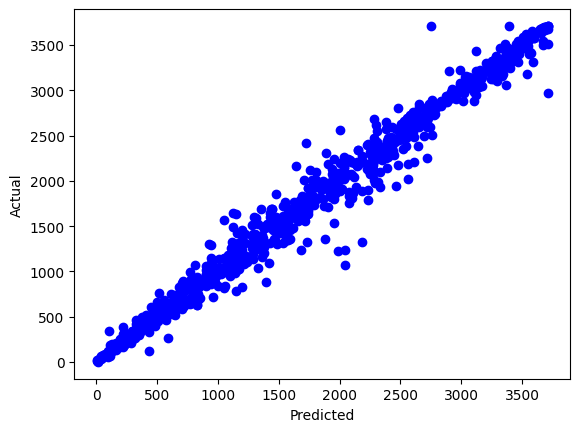

In [ ]:
predict(DecisionTreeRegressor(),X,y)

In [ ]:
y_pred_tree = tree_model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

In [ ]:
print("Decision Tree Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

Decision Tree Performance:
MAE: 139.35993682261383
RMSE: 192.4487108585015
R² Score: 0.9681540099419416


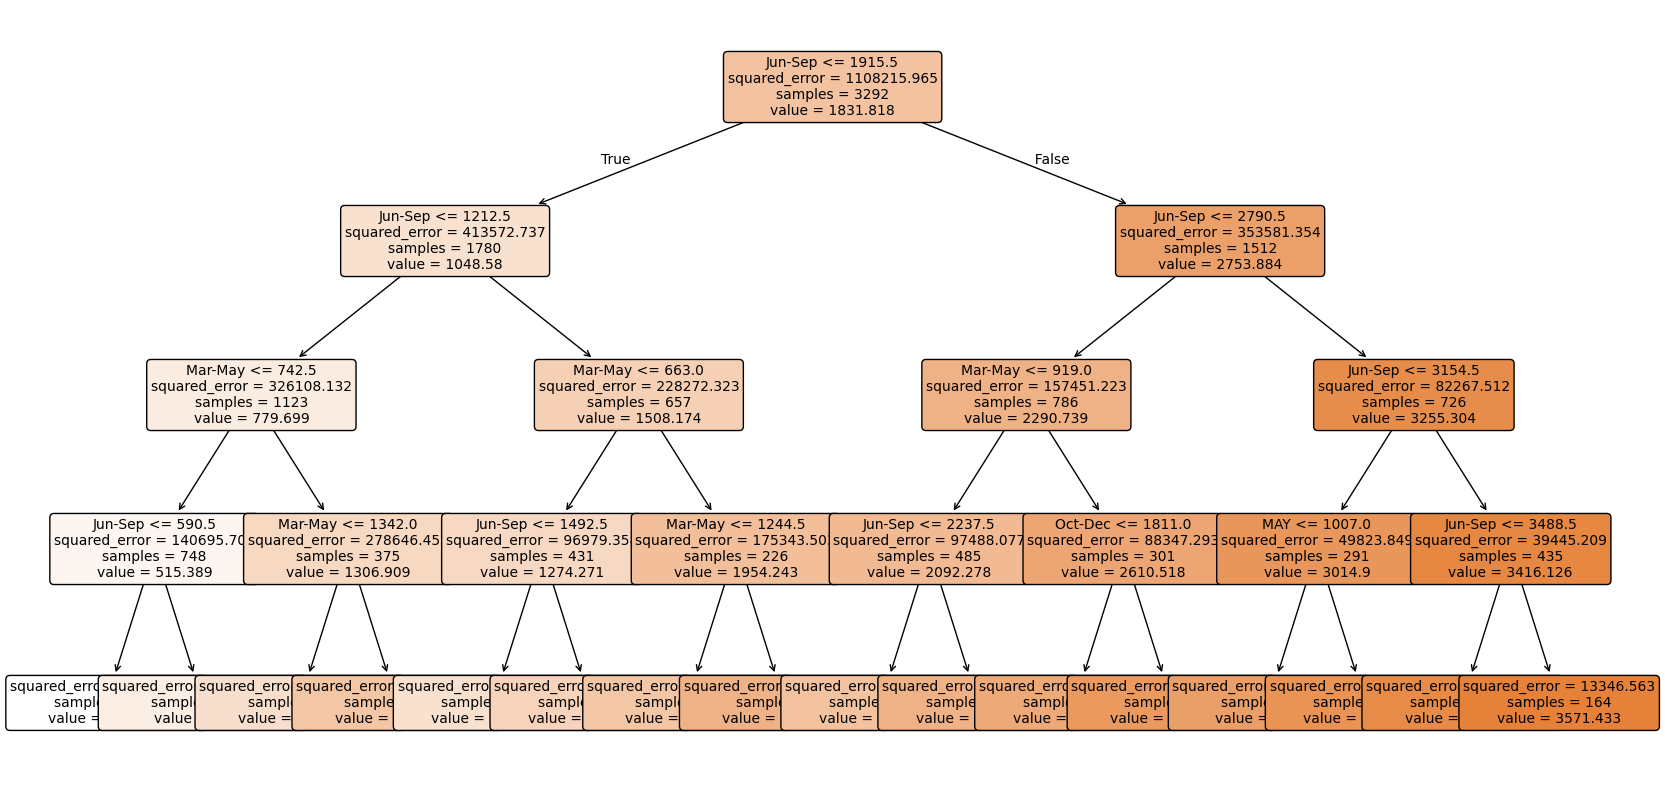

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

R^2 is -2.8980329813871295
 Adj R^2 is 0.992797607316396
 RMSE is: 88.37809127398606


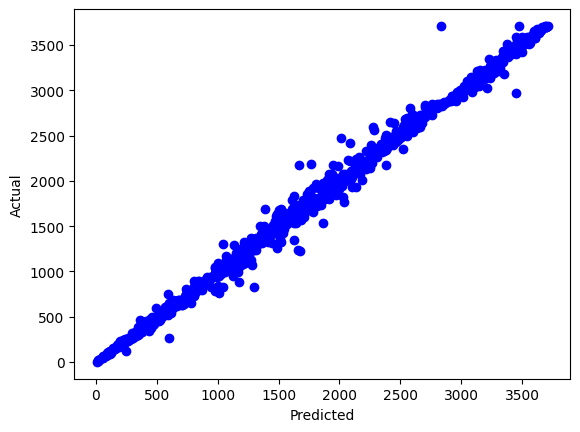

In [ ]:
# Random Forest Regressor
rf_model = predict(RandomForestRegressor(n_estimators=100, random_state=42), X, y)

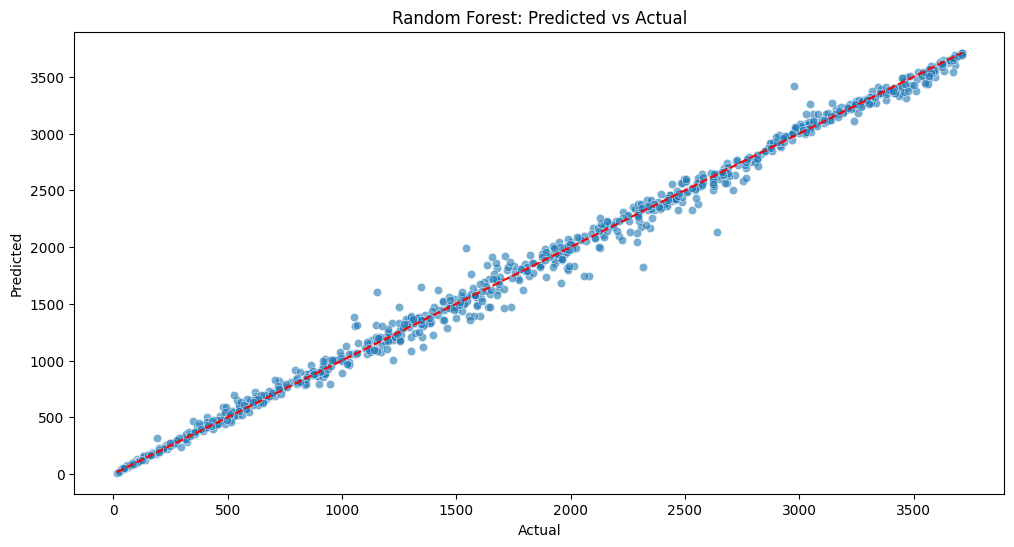

In [ ]:
# 1. Predicted vs Actual
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

In [ ]:
# Train Random Forest Regressor Model
# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 132.3947902448467
RMSE: 173.8400514458218
R² Score: 0.97401489797488


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = [rmse, mae, r2]

results_data = pd.DataFrame(results, index=["RMSE", "MAE", "R²"]).T

print(" Model Comparison Results:")
print(results_data)

 Model Comparison Results:
                         RMSE         MAE        R²
Linear Regression  173.840051  132.394790  0.974015
Decision Tree      147.980196   91.820388  0.981171
Random Forest       78.523442   49.659405  0.994698


Let's evaluate all accuraracy data at one place

In [ ]:
import lightgbm
import time
from math import sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [ ]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_Time': 0.007790088653564453,
  'Train_R2_Score': 0.9665211415259164,
  'Test_R2_Score': 0.9740148979748798,
  'Test_RMSE_Score': 173.84005144582187},
 {'Name': 'DecisionTree ',
  'Train_Time': 0.13935589790344238,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.980641168632375,
  'Test_RMSE_Score': 150.0469586690288},
 {'Name': 'RandomForest ',
  'Train_Time': 7.426691293716431,
  'Train_R2_Score': 0.998607098726569,
  'Test_R2_Score': 0.9947857734445502,
  'Test_RMSE_Score': 77.87222383432305}]

## Compare Models Accuracy

In [ ]:
data_all_model=pd.DataFrame(model_data)
data_all_model

Name  Train_Time  Train_R2_Score  Test_R2_Score  \
0  LinearRegression:     0.007790        0.966521       0.974015   
1       DecisionTree     0.139356        1.000000       0.980641   
2       RandomForest     7.426691        0.998607       0.994786   

   Test_RMSE_Score  
0       173.840051  
1       150.046959  
2        77.872224

As per above results Train and Test R2 Score is nearby in good model.

A score near 1 means the model is very good.

So, In above results best models are :

No	Model Name	Model Accuracy Score in %

1. LinearRegression ≈ 97.40%

2. DecisionTree ≈ 98.06%

3. RandomForest ≈ 99.48%

# **CONCLUSION**
In the course of this machine learning study on Indian rainfall data (1901–2015), we evaluated multiple regression models to determine the most suitable approach for rainfall prediction. Our comparative analysis across Linear Regression, Decision Tree, Random Forest, and advanced boosting methods revealed a clear hierarchy of performance.

Among the classical models, Random Forest consistently outperformed others, achieving an exceptional R² score of approximately 99.5% on the test set, alongside the lowest RMSE (≈77.87). This indicates not only high predictive accuracy but also excellent generalization, with minimal discrepancy between training and testing scores. While Linear Regression delivered stable results and Decision Tree achieved near-perfect training accuracy, in behind Random Forest in terms of robustness and error reduction.

---